# Income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, product
import json

In [2]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'
yrimmig_2023_path = r'../../data/yrimmig_codes_2023.csv'
citizenship_path = r'../../data/citizenship_codes.csv'
occ2010_data_path = r'../../data/occ2010_codes.txt'

In [3]:
data_df = pd.read_csv(data_path, sep=';')

race_codes_df = pd.read_csv(race_occ_path, sep=';')

yrimmig_2023 = pd.read_csv(yrimmig_2023_path, sep=';')
citizenship_codes_df = pd.read_csv(citizenship_path, sep=';')

occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1376174312.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)


In [4]:
data_df['YRIMMIG'].fillna(0, inplace=True)

In [5]:
data_df['YRIMMIG'] = data_df['YRIMMIG'].astype('int64')

In [6]:
top_5_races = [100, 200, 651, 300, 801]

----
## Is there a different income between different races?
- INCWAGE
- RACE
- YRIMMIG (year of immigration)
- CITIZEN (citizenship status)

In [7]:
income_races = data_df[['RACE', 'INCWAGE', 'YEAR']]
income_races = income_races.merge(race_codes_df, on='RACE')

### over all years

In [8]:
avg_incomes = income_races.groupby(['race_title'])['INCWAGE'].mean().reset_index().sort_values('INCWAGE', ascending=False)

C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\4116173041.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


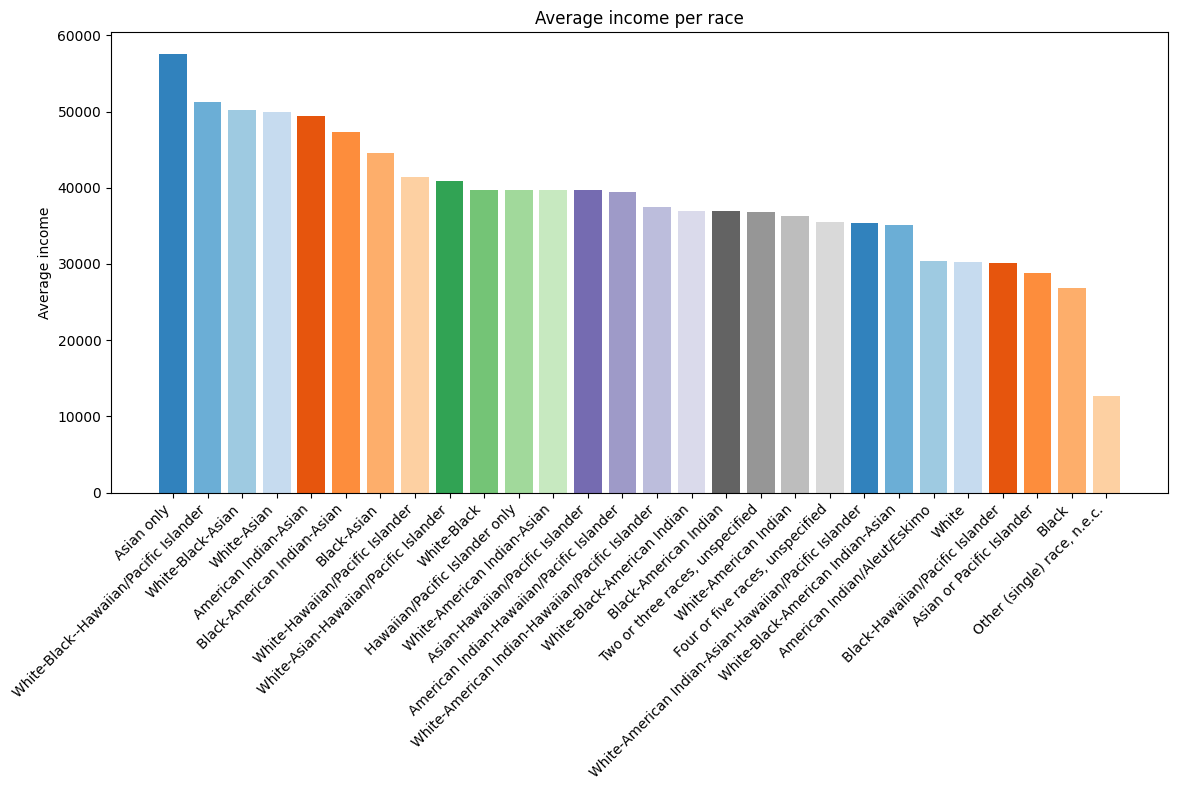

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(avg_incomes['race_title'], avg_incomes['INCWAGE'], color=plt.cm.tab20c.colors
        )

ax.set_title('Average income per race', y = 1)
ax.set(ylabel='Average income')
ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')

plt.tight_layout()
plt.savefig(r'../../plots/income/avg_per_race_overall.png')
plt.show()

### per year

In [10]:
def plot_avg_income_year(df: pd.DataFrame, year: int):
    df = df[df['YEAR'] == year]
    display(df[df['RACE'] == 100]['INCWAGE'].mean())

    avg_incomes = df.groupby(['race_title'])['INCWAGE'].mean().reset_index().sort_values('INCWAGE', ascending=False)
    display(avg_incomes)

    fig, ax = plt.subplots(figsize=(12, 8))
    bar_container = ax.bar(avg_incomes['race_title'], avg_incomes['INCWAGE'], color=plt.cm.tab20c.colors
            )

    ax.set_title(f'{year}: Average income per race', y = 1)
    ax.set(ylabel='Average income')
    ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/avg_per_race_{year}.png')
    plt.show()

    return(avg_incomes)

67047.25505810181

,race_title,INCWAGE
0,American Indian-Asian,117950.000000
20,White-Black--Hawaiian/Pacific Islander,101300.000000
9,"Four or five races, unspecified",90461.600000
3,Asian only,86747.627879
17,White-Asian,79367.344937
18,White-Asian-Hawaiian/Pacific Islander,74834.705882
14,White-American Indian-Asian,72412.714286
12,White,67047.255058
7,Black-Asian,61402.352941
22,White-Black-Asian,56639.818182


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


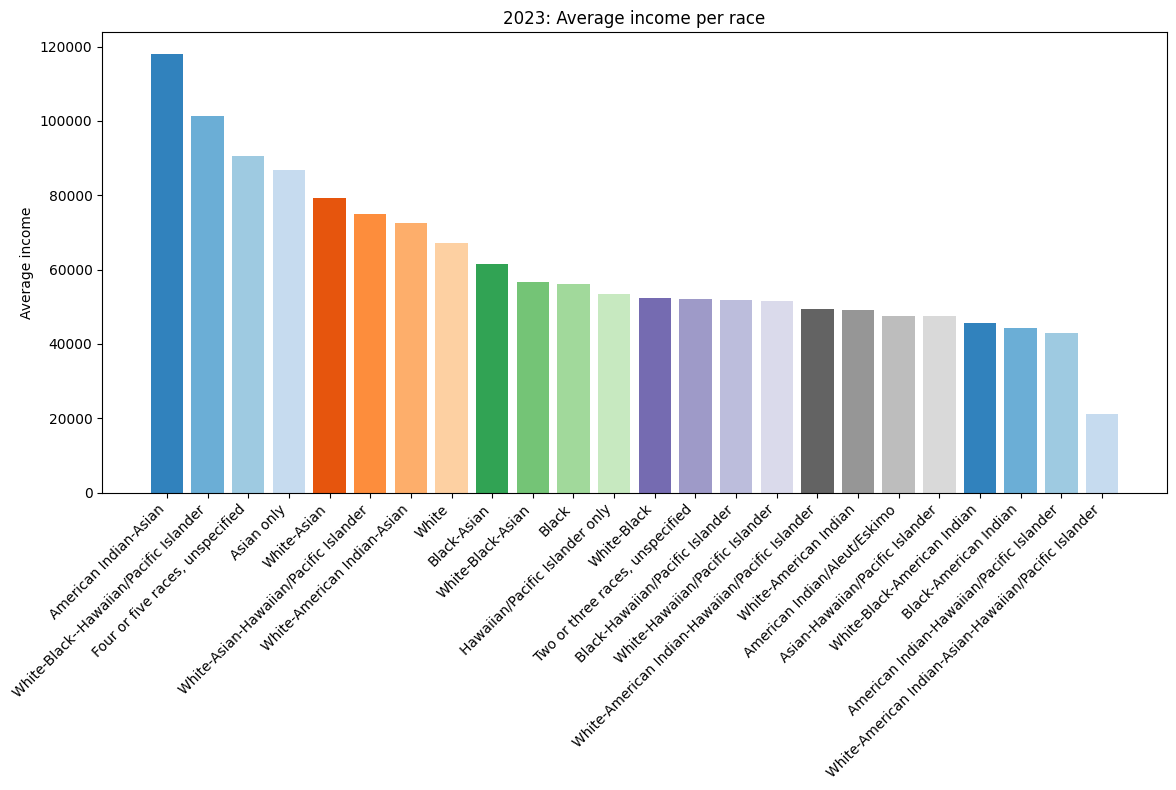

In [11]:
avg_incomes_2023 = plot_avg_income_year(income_races, 2023)

59549.68655770936

,race_title,INCWAGE
22,White-Black-Asian,128254.454545
19,White-Black--Hawaiian/Pacific Islander,95000.000000
21,White-Black-American Indian-Asian,93333.333333
3,Asian only,74141.309905
11,"Two or three races, unspecified",72000.000000
14,White-American Indian-Asian,69666.666667
20,White-Black-American Indian,63918.529412
16,White-Asian,60483.466165
12,White,59549.686558
18,White-Black,53753.179688


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


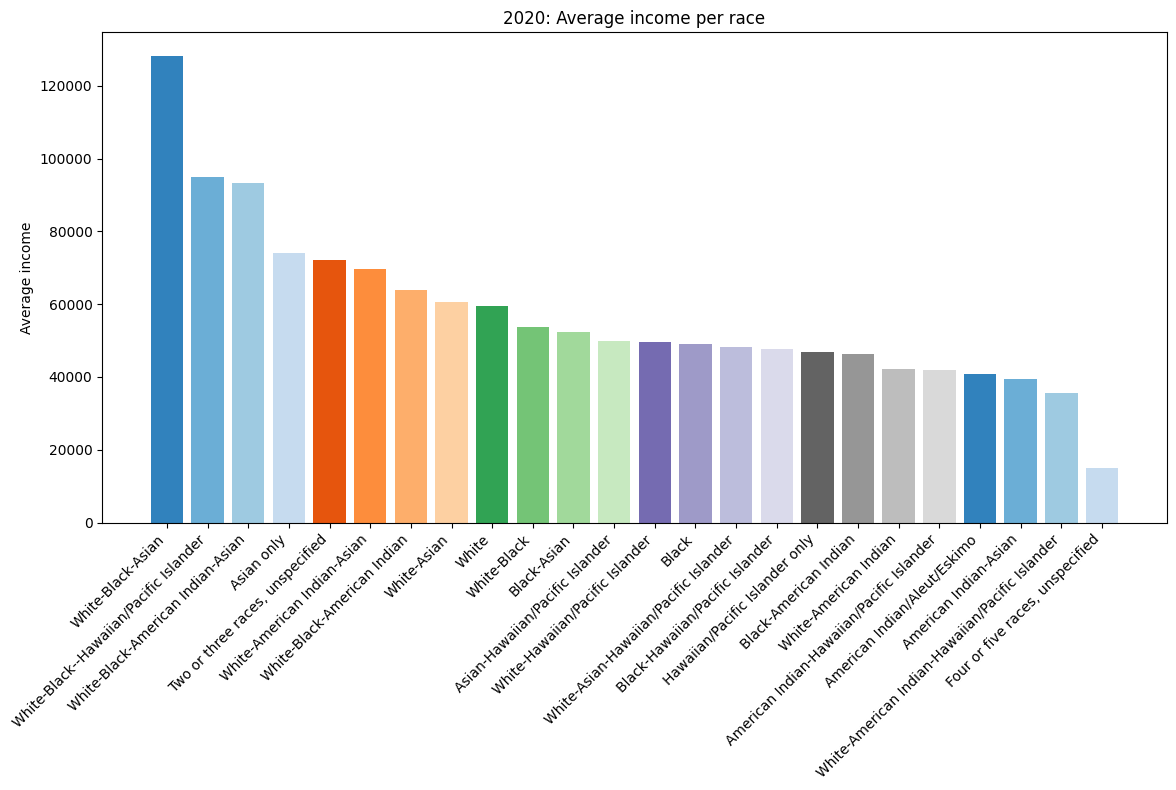

In [12]:
avg_incomes_2020 = plot_avg_income_year(income_races, 2020)

43735.632561787854

,race_title,INCWAGE
10,"Two or three races, unspecified",53568.666667
0,American Indian-Asian,52175.000000
15,White-Asian-Hawaiian/Pacific Islander,50318.632184
18,White-Black-Asian,50000.000000
2,Asian only,49967.338638
14,White-Asian,47423.322222
11,White,43735.632562
4,Black,36023.338326
16,White-Black,35574.635417
3,Asian-Hawaiian/Pacific Islander,34742.755102


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


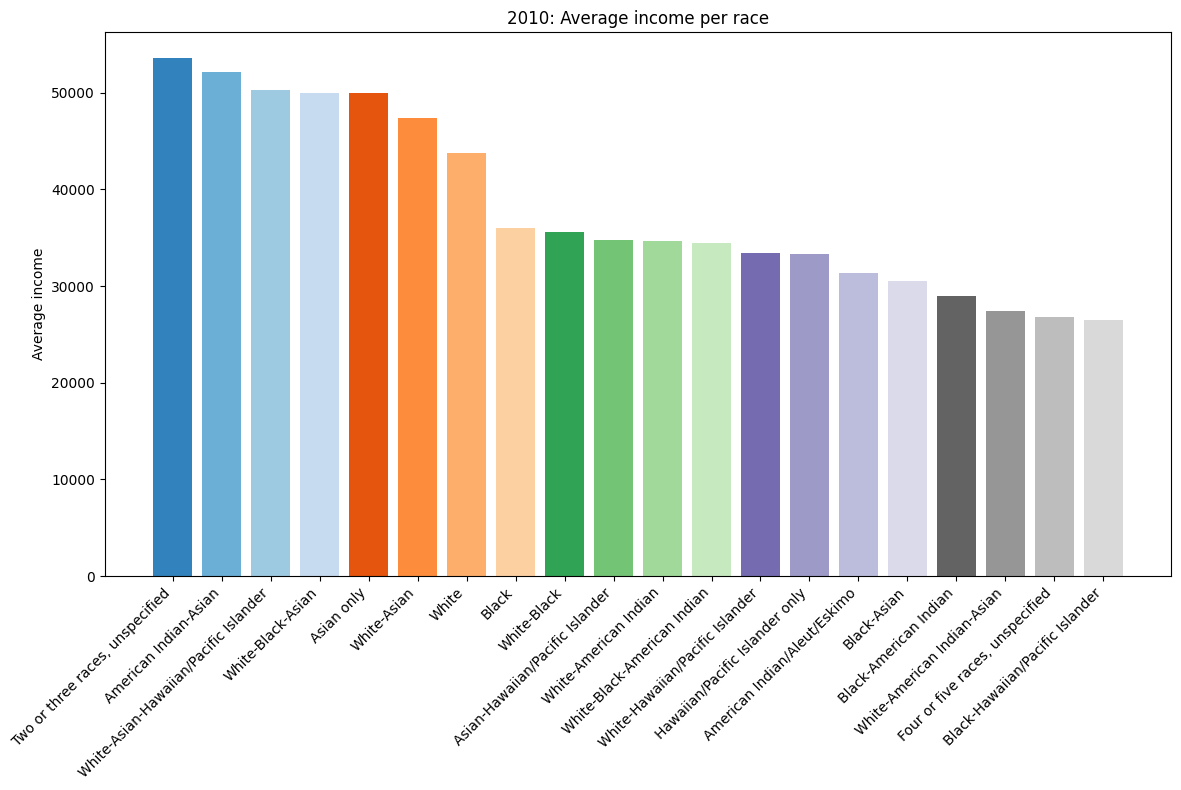

In [13]:
avg_incomes_2010 = plot_avg_income_year(income_races, 2010)

30892.21830518475

,race_title,INCWAGE
1,Asian or Pacific Islander,33385.388738
3,White,30892.218305
2,Black,26488.465620
0,American Indian/Aleut/Eskimo,23603.335735


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


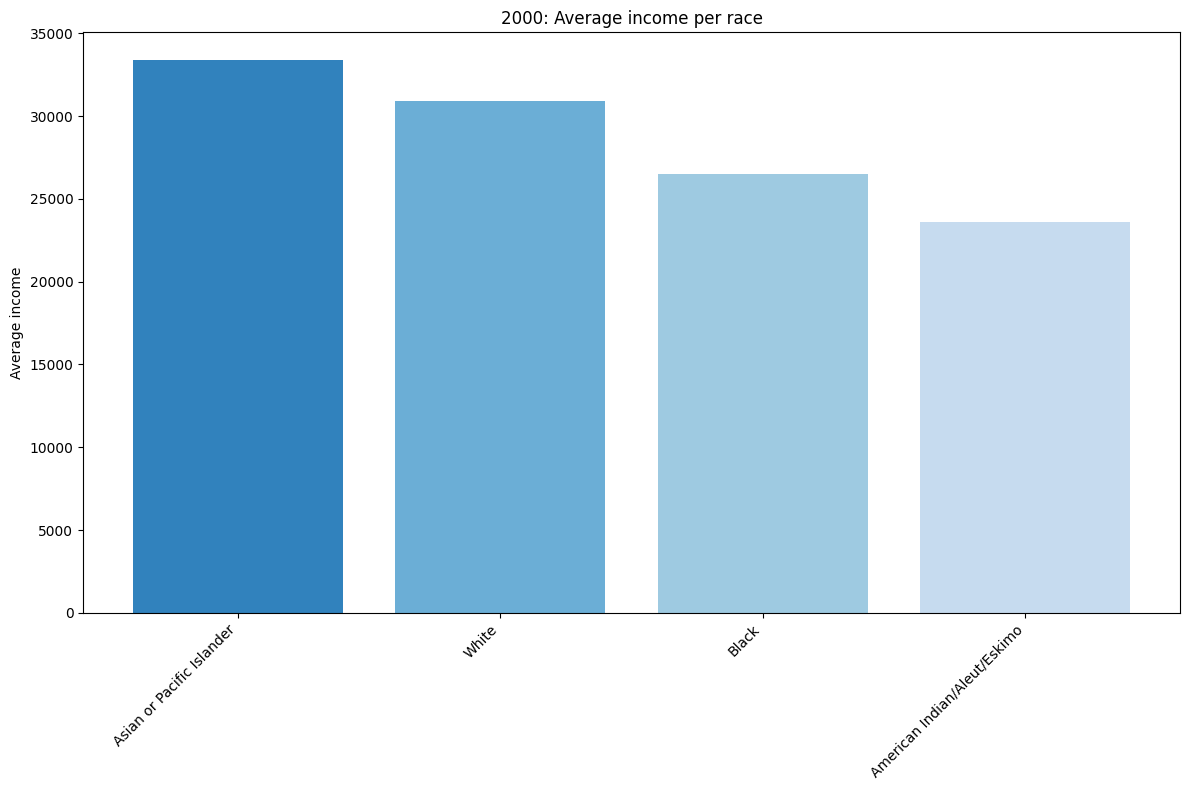

In [14]:
avg_incomes_2000 = plot_avg_income_year(income_races, 2000)

21816.885613246523

,race_title,INCWAGE
1,Asian or Pacific Islander,23079.433849
4,White,21816.885613
3,"Other (single) race, n.e.c.",18854.840336
2,Black,18639.383978
0,American Indian/Aleut/Eskimo,16837.429644


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


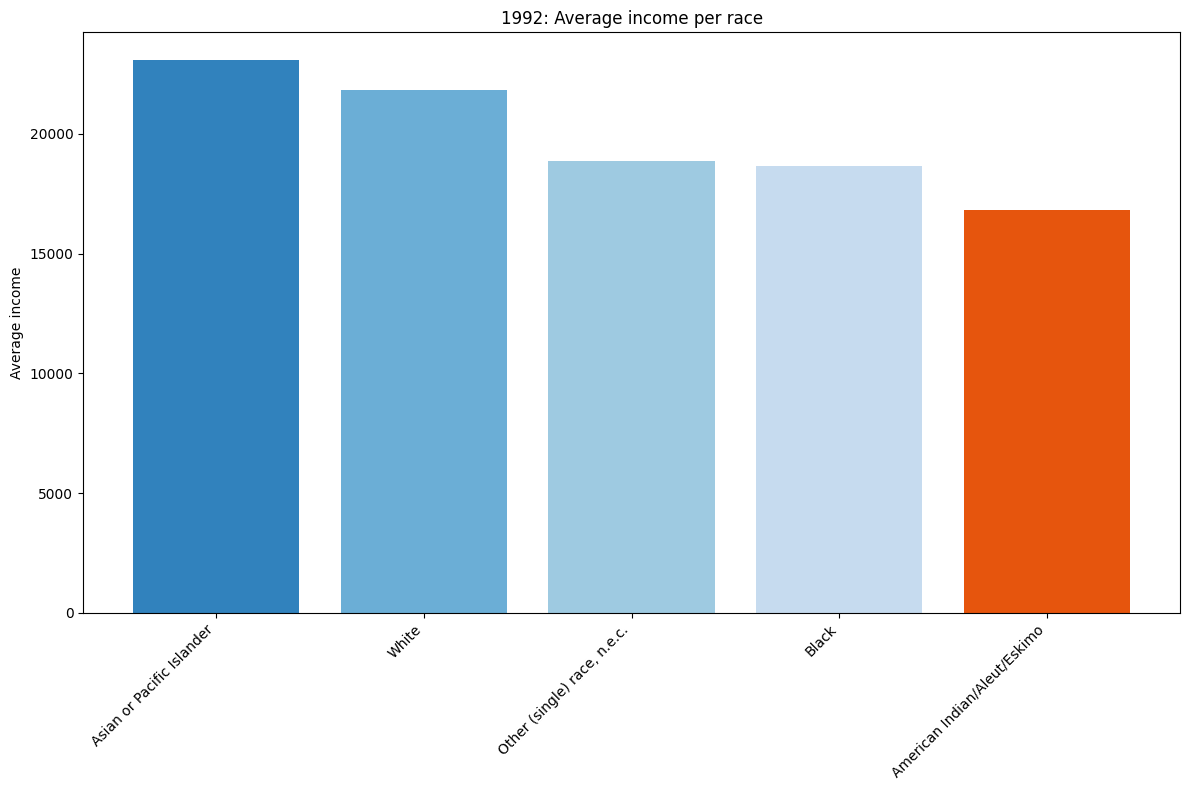

In [15]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1992)

In [16]:
data_df['YEAR'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

5109.282985936967

,race_title,INCWAGE
2,White,5109.282986
1,"Other (single) race, n.e.c.",4427.416968
0,Black,3251.824778


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


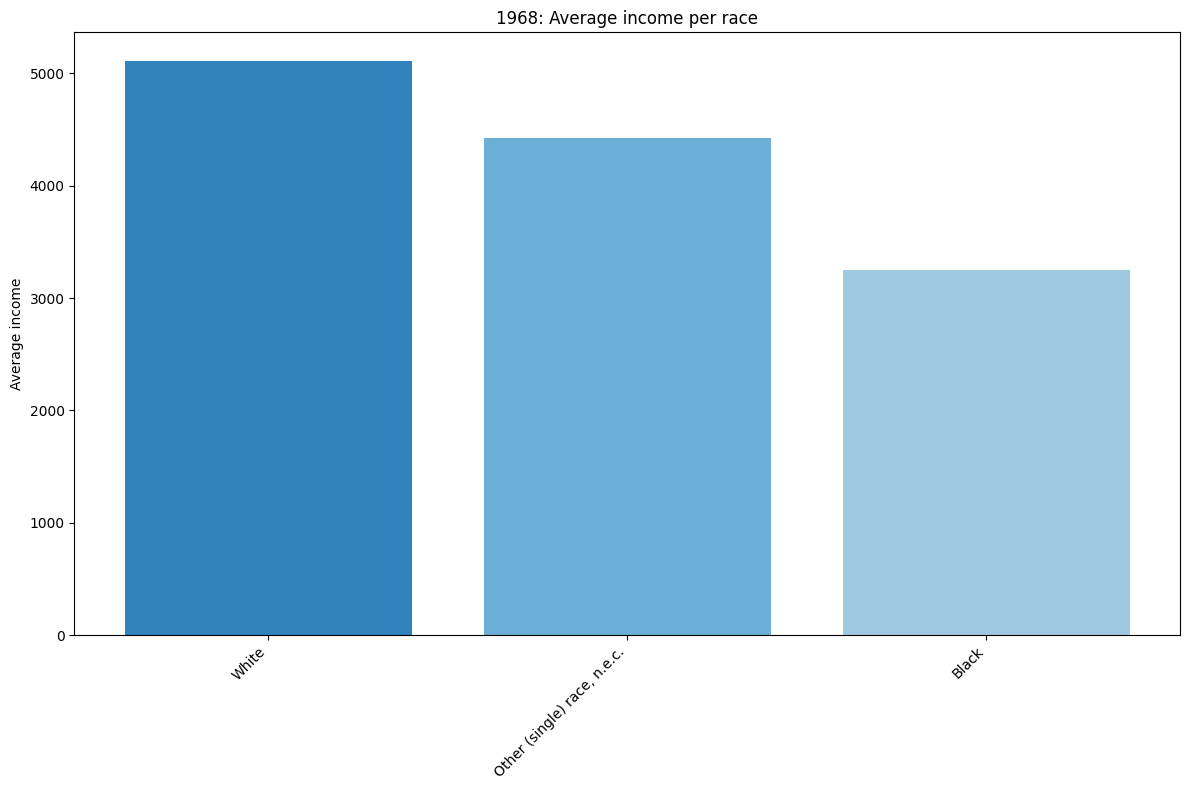

In [17]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1968)

6008.054227922225

,race_title,INCWAGE
2,White,6008.054228
1,"Other (single) race, n.e.c.",5297.159041
0,Black,4060.223682


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


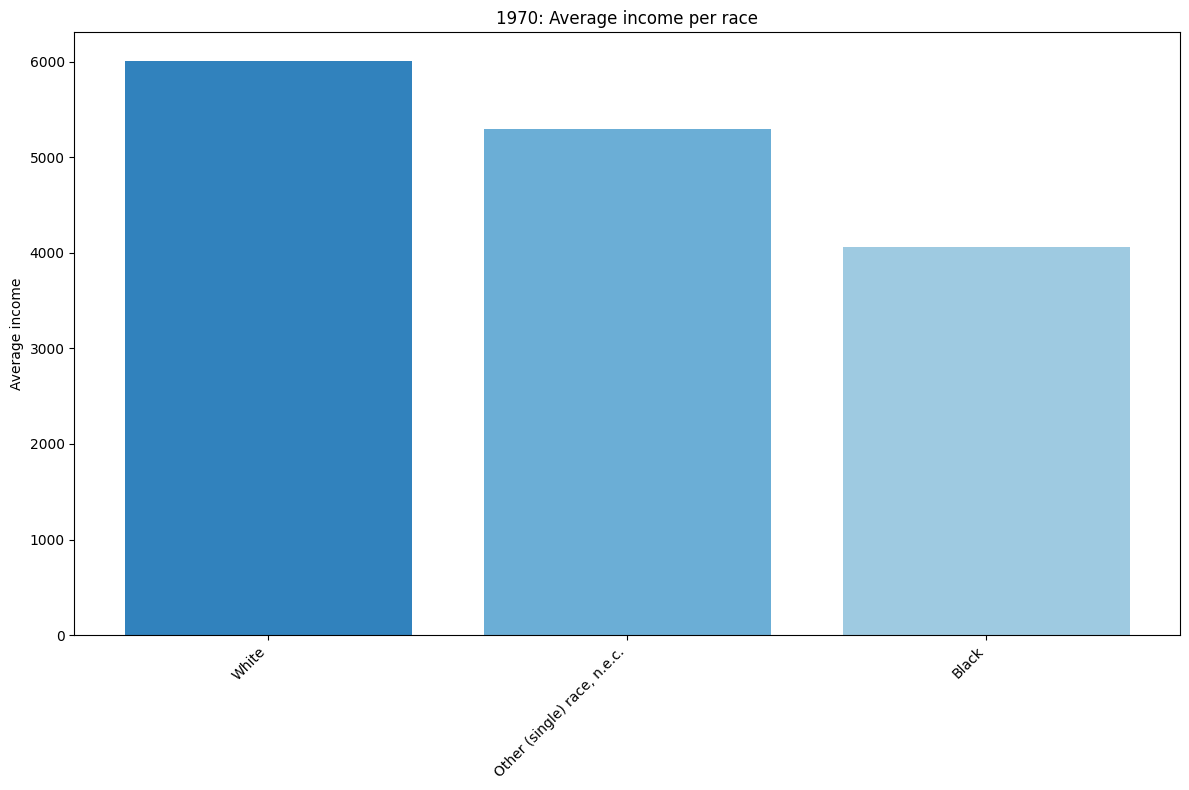

In [18]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1970)

11545.94663217827

,race_title,INCWAGE
2,White,11545.946632
1,"Other (single) race, n.e.c.",10842.211529
0,Black,9569.584228


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


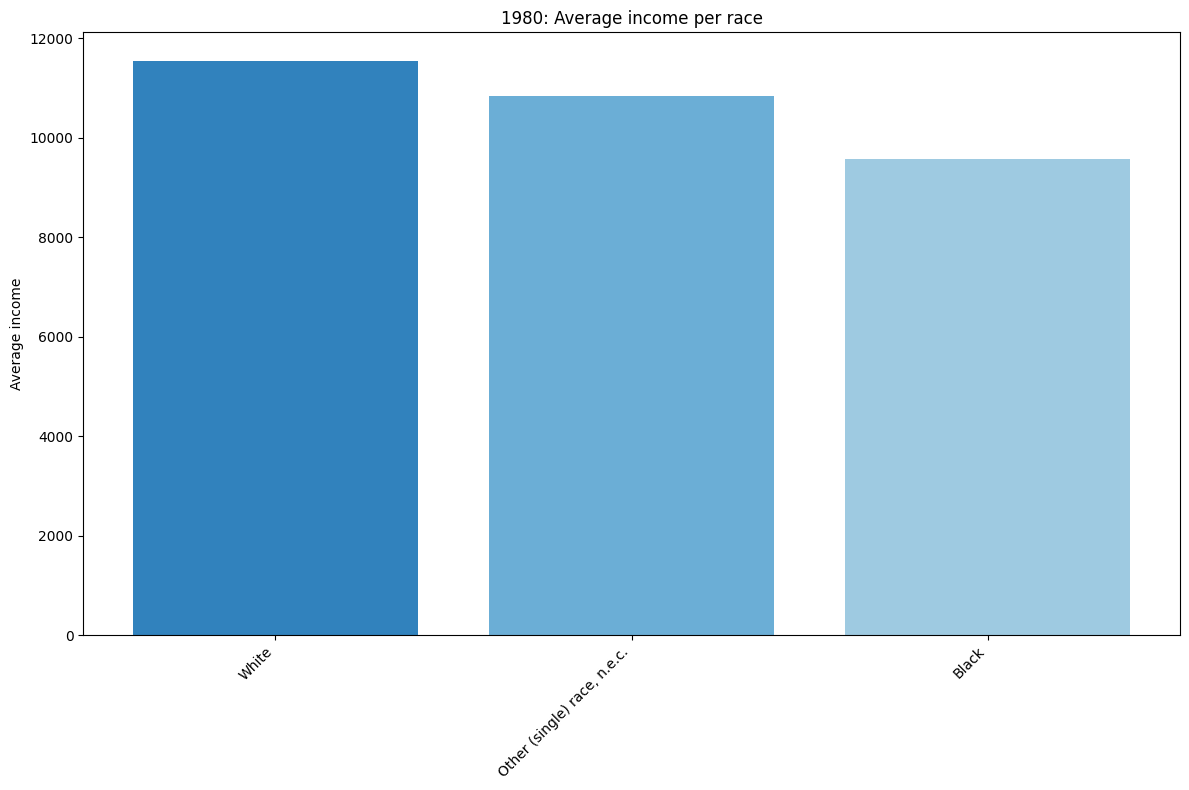

In [19]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1980)

17982.803689901237

,race_title,INCWAGE
2,White,17982.803690
1,"Other (single) race, n.e.c.",17587.081293
0,Black,15030.650336


C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\1582236286.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_incomes['race_title'], rotation = 45, ha='right')


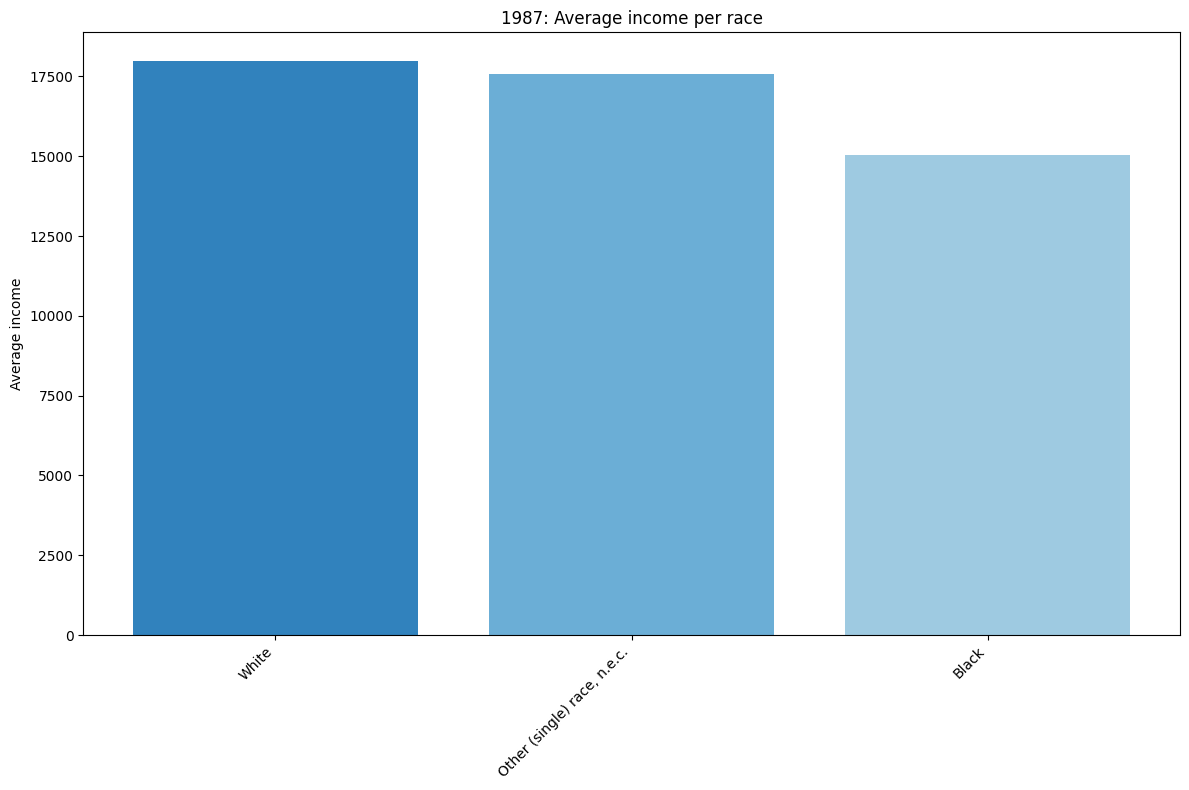

In [20]:
avg_incomes_1992 = plot_avg_income_year(income_races, 1987)

Difference for whites when seperating hispanics from non-hispanics? <br>
There is a huge gap between the average income of hispanic whites and non hispanic whites. However, even non hispanic whites do not earn enough to significantly improve in the overall income ranking (only move 1 place upwards.)

In [21]:
income_races_white = data_df[['RACE', 'INCWAGE', 'YEAR', 'HISPAN']]
income_races_white = income_races_white.merge(race_codes_df, on='RACE')

income_races_white_2023 = income_races_white[(income_races_white['YEAR'] == 2023) & (income_races_white['RACE'] == 100)]
income_races_white_2023['INCWAGE'].mean()

67047.25505810181

In [22]:
income_races_white_not_hispanic = income_races_white_2023[income_races_white_2023['HISPAN'] == 0.0]
income_races_white_hispanic = income_races_white_2023[~(income_races_white_2023['HISPAN'] == 0.0)]

In [23]:
income_races_white_hispanic['INCWAGE'].mean()

48594.59861956963

In [24]:
income_races_white_not_hispanic['INCWAGE'].mean()

72942.97070880033

In [25]:
avg_incomes_2023

,race_title,INCWAGE
0,American Indian-Asian,117950.000000
20,White-Black--Hawaiian/Pacific Islander,101300.000000
9,"Four or five races, unspecified",90461.600000
3,Asian only,86747.627879
17,White-Asian,79367.344937
18,White-Asian-Hawaiian/Pacific Islander,74834.705882
14,White-American Indian-Asian,72412.714286
12,White,67047.255058
7,Black-Asian,61402.352941
22,White-Black-Asian,56639.818182


----
## Does the immigration time influence the average income?

- citizenship status only available from 1994 onwards, before nan
- same for YRIMMIG

YRIMMIG Universe includes 'Foreign-born persons, and persons born in U.S. outlying areas.'. Hence, we only focus on people in the universe and remove those with code NIU.


"The earliest date identified in these data is "before 1950." Other codes cover a ten-year period (1950-1959), five-year periods between 1960 and 1979, two-year periods for the time between 1980 and 1991, and varying periods (of two years, three years, and four years) thereafter. The specific years grouped together for the period after 1991 differ over time. For example, the 2001 survey combined the years 1998 to 2001, while the 2002 survey provided separate codes for 1998-1999 and 2000-2002. Comparability across the survey period can be achieved by combining data on recent immigrants into a single "after 1991" classification and using the codes provided for the period between 1950 and 1991. Alternatively, the four-digit code can be interpreted as the latest year in which a respondent could possibly have immigrated, since the codes represent the final year in each interval."

In [26]:
income_races = data_df[['RACE', 'INCWAGE', 'YEAR', 'YRIMMIG', 'CITIZEN']]
income_races = income_races.merge(race_codes_df, on='RACE')

In [27]:
# only keep people that are in the universe
niu = income_races['YRIMMIG'] == 0
income_races = income_races[~niu]

### 2023


In [28]:
income_races_2023 = income_races[income_races['YEAR'] == 2023]

In [36]:
all_races_income = income_races_2023.groupby('YRIMMIG')['INCWAGE'].mean().reset_index()
all_races_income = all_races_income.merge(yrimmig_2023, on='YRIMMIG', how='left')

C:\Users\jputz\AppData\Local\Temp\ipykernel_6612\2010444757.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(all_races_income['timespan'], rotation = 45, ha='right')


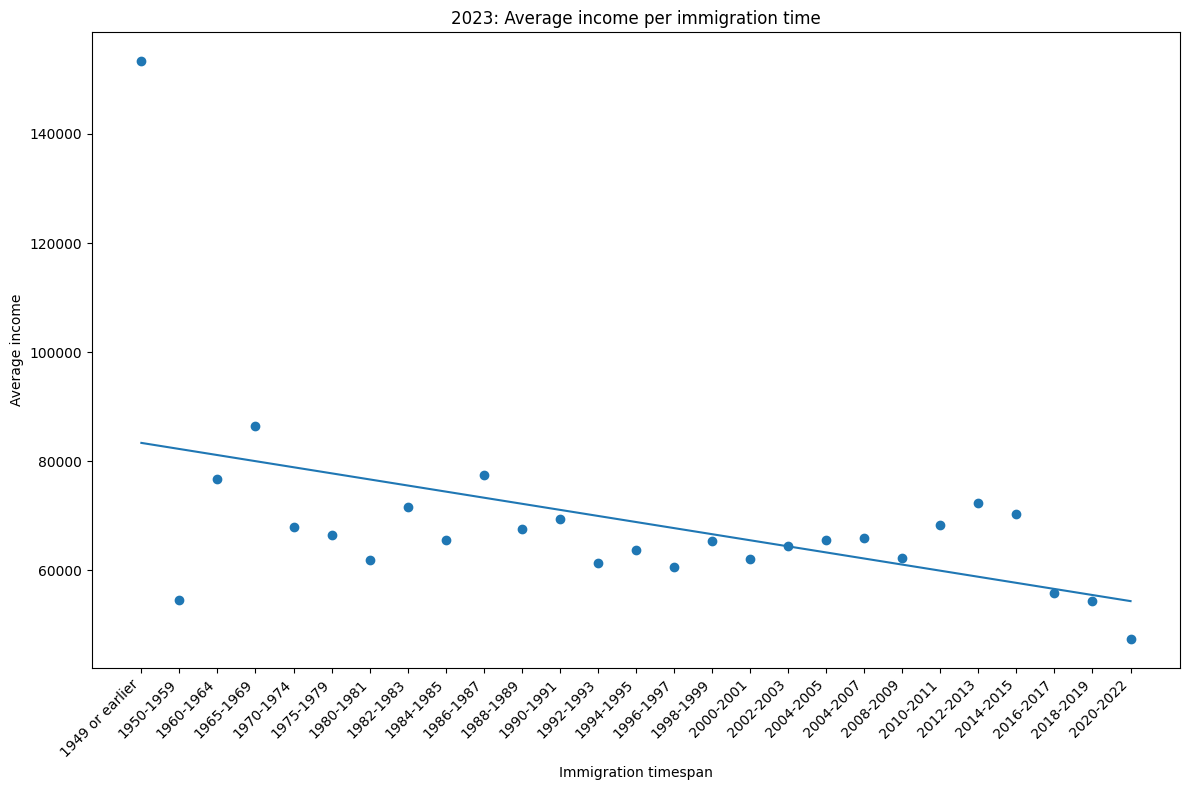

In [37]:
x = np.arange(all_races_income['timespan'].size)
y = all_races_income['INCWAGE']

fit = np.polyfit(x, y, deg=1)
fit_function = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(all_races_income['timespan'], y, marker='o')
    
ax.set_title(f'2023: Average income per immigration time', y = 1)
ax.set(ylabel='Average income', xlabel='Immigration timespan')
ax.set_xticklabels(all_races_income['timespan'], rotation = 45, ha='right')

ax.plot(all_races_income['timespan'], fit_function(x))

plt.tight_layout()
plt.savefig(f'../../plots/income/yrimmig_2023.png')
plt.show()

In [29]:
avg_income_yrimmig = income_races_2023.groupby(['RACE', 'YRIMMIG', 'race_title'])['INCWAGE'].mean().reset_index()

In [30]:
avg_income_yrimmig = avg_income_yrimmig.merge(yrimmig_2023, on='YRIMMIG', how='left')

 
-1487 x + 8.006e+04


C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\1132123096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


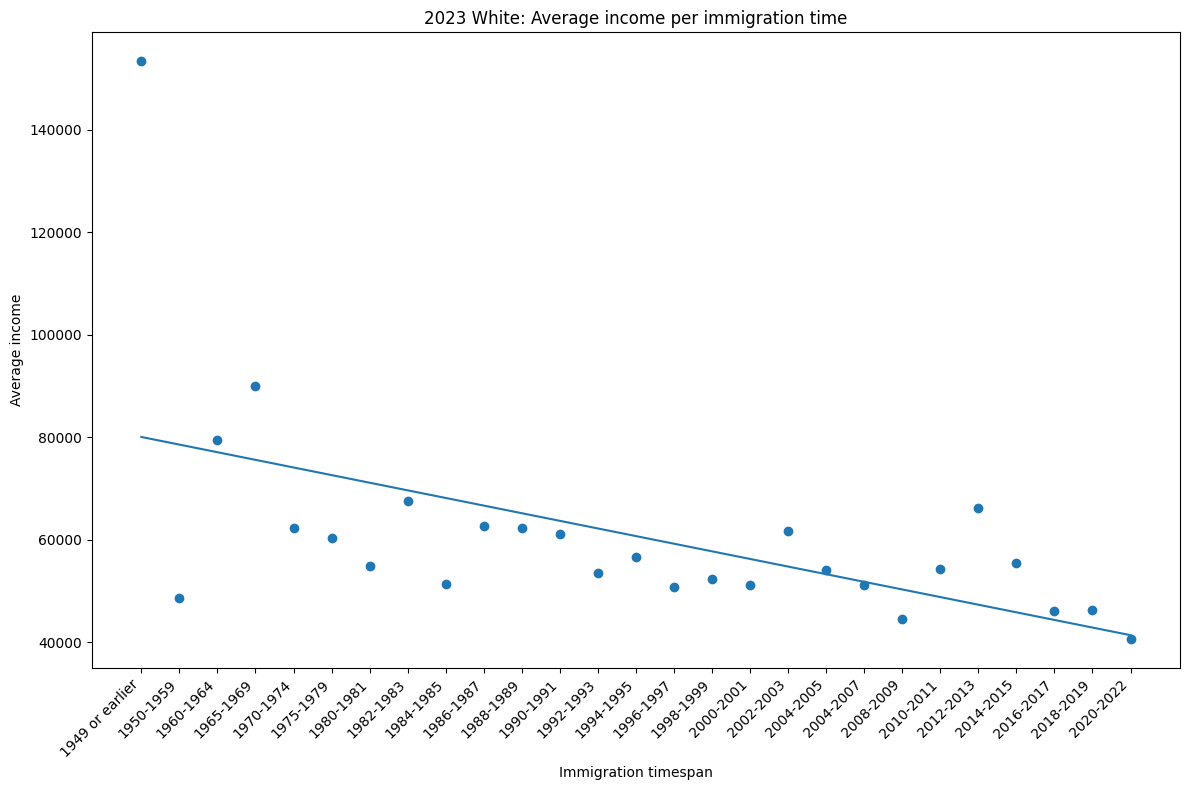

 
-595 x + 6.773e+04


C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\1132123096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


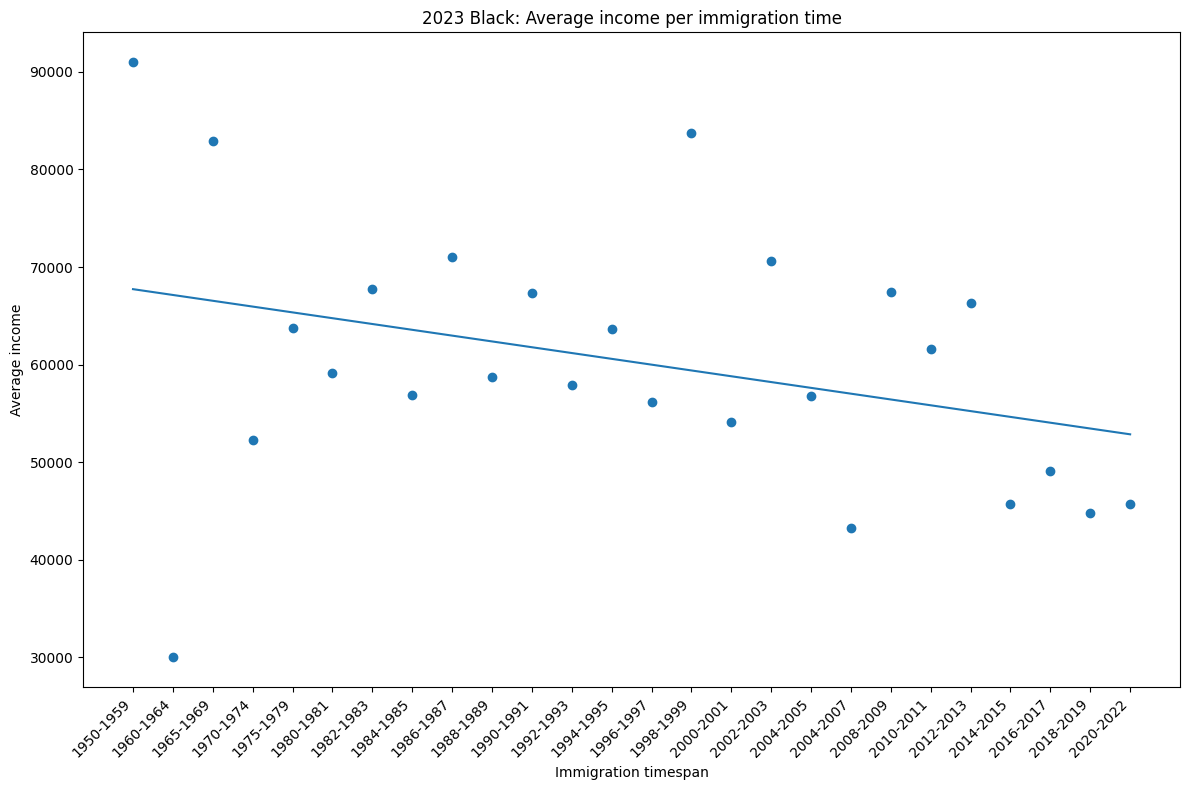

 
215.9 x + 8.486e+04


C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\1132123096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


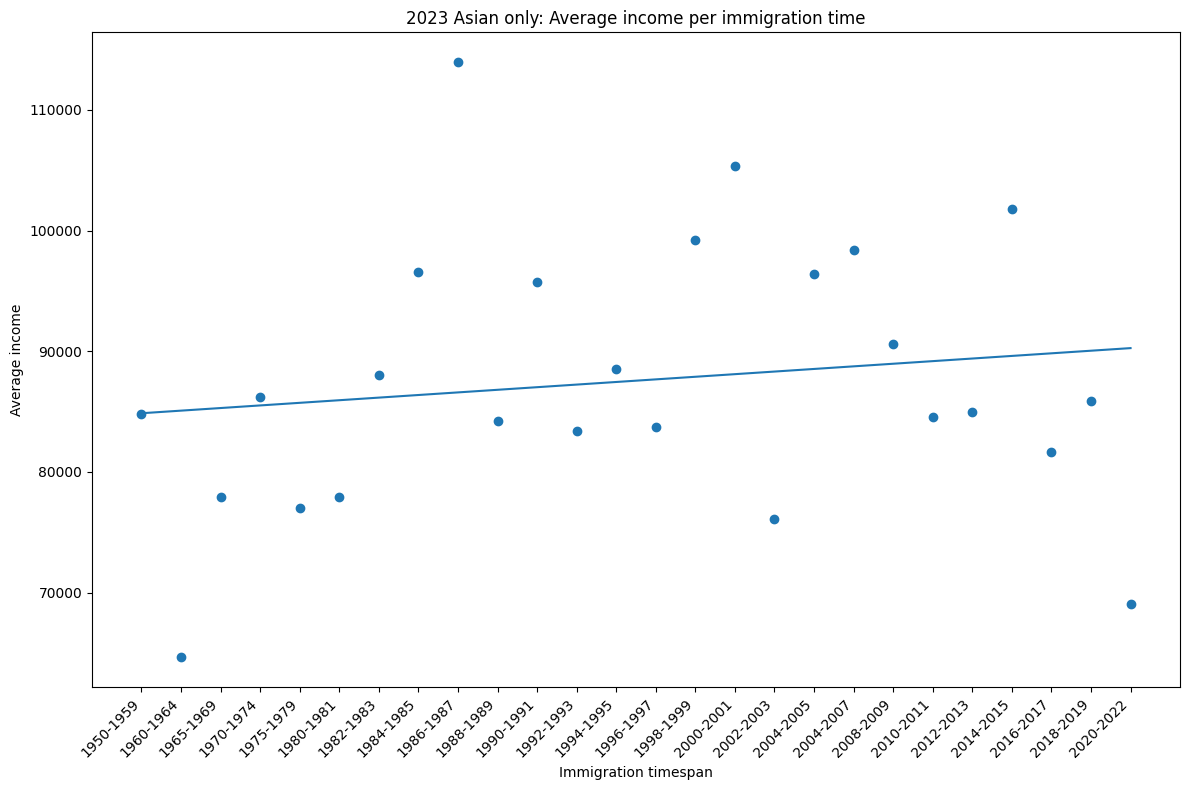

 
-386.2 x + 5.259e+04


C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\1132123096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


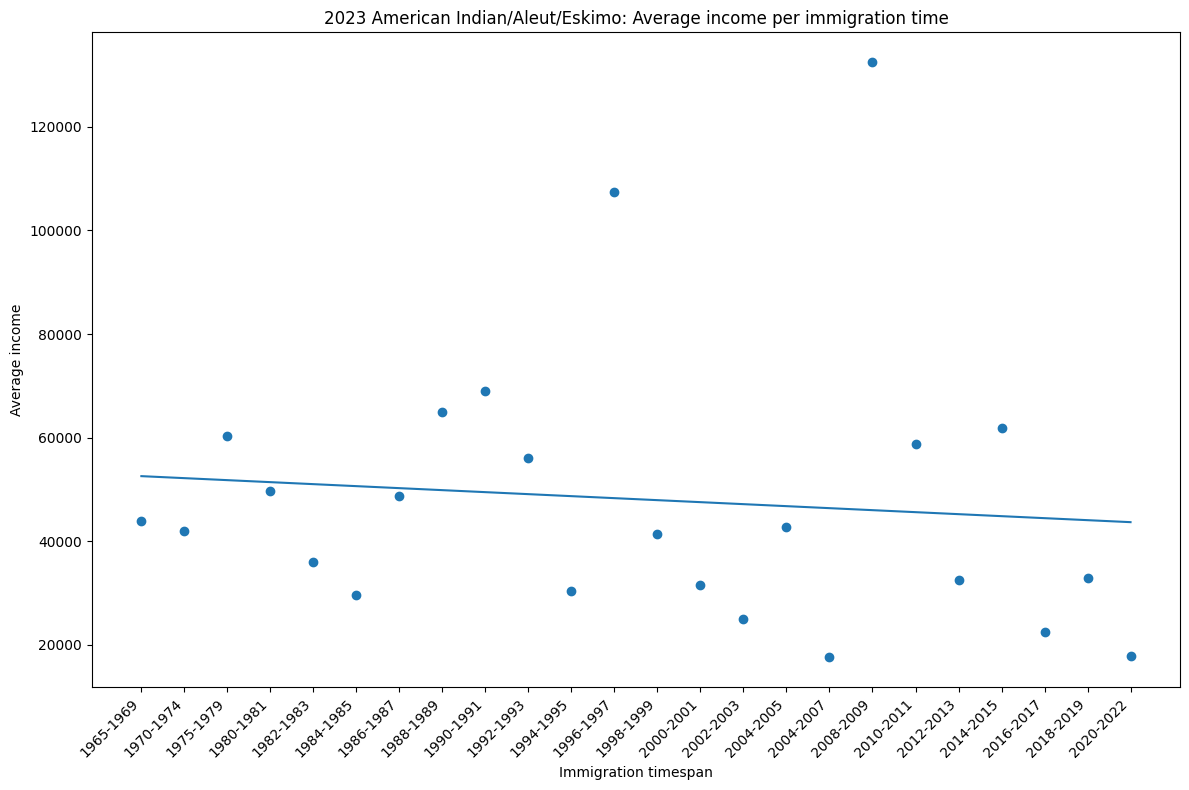

 
-1096 x + 6.452e+04


C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\1132123096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')


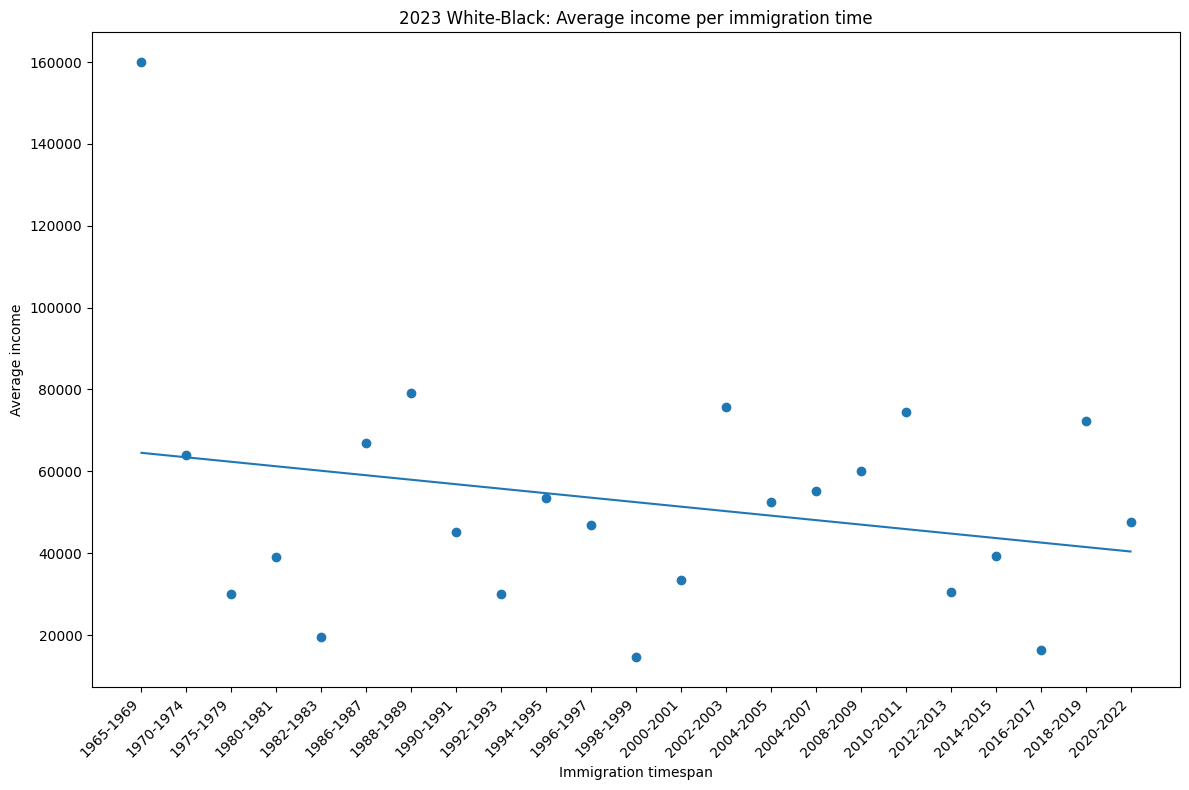

In [61]:
for race in top_5_races:
    avg_income_yrimmig_race = avg_income_yrimmig[avg_income_yrimmig['RACE'] == race]

    x = np.arange(avg_income_yrimmig_race['timespan'].size)
    y = avg_income_yrimmig_race['INCWAGE']

    fit = np.polyfit(x, y, deg=1)
    fit_function = np.poly1d(fit)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(avg_income_yrimmig_race['timespan'], y, marker='o')
    
    ax.set_title(f'2023 {avg_income_yrimmig_race["race_title"].values[0]}: Average income per immigration time', y = 1)
    ax.set(ylabel='Average income', xlabel='Immigration timespan')
    ax.set_xticklabels(avg_income_yrimmig_race['timespan'], rotation = 45, ha='right')

    ax.plot(avg_income_yrimmig_race['timespan'], fit_function(x))


    plt.tight_layout()
    plt.savefig(f'../../plots/income/yrimmig_2023_{race}.png')
    plt.show()

----
## Does the citizenship status influence the average income?

In [33]:
avg_income_citizen = data_df[['YEAR', 'RACE', 'CITIZEN', 'INCWAGE', 'ASECWT']]

Since the nan values carry no helpful information and nothing can be even derived from it, they are removed for this part of the analysis.

In [34]:
avg_income_citizen['CITIZEN'].unique()

array([nan,  1.,  5.,  3.,  4.,  2.])

In [35]:
avg_income_citizen['YEAR'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [36]:
avg_income_citizen.dropna(inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\3341867856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income_citizen.dropna(inplace=True)


In [37]:
avg_income_citizen['CITIZEN'] = avg_income_citizen['CITIZEN'].astype('int64')

C:\Users\jputz\AppData\Local\Temp\ipykernel_28872\4014659217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income_citizen['CITIZEN'] = avg_income_citizen['CITIZEN'].astype('int64')


In [48]:
def plot_avg_income_citizenship(avg_income_citizen: pd.DataFrame, year: int, race: str, r = None):

    # select year
    avg_income_citizen = avg_income_citizen[avg_income_citizen['YEAR'] == year]

    # calculate average income per citizenship
    avg_income_per_citizenship = avg_income_citizen.groupby('CITIZEN')['INCWAGE'].mean().reset_index()

    # merge with citizenship titles
    avg_income_per_citizenship = avg_income_per_citizenship.merge(citizenship_codes_df, on='CITIZEN', how='left')

    # plot as pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    total = sum(avg_income_per_citizenship['INCWAGE'])
    ax.pie(avg_income_per_citizenship['INCWAGE'], labels=avg_income_per_citizenship['citizenship_title'],
            rotatelabels=True, labeldistance=.1, explode=[0.02] * len(avg_income_per_citizenship['citizenship_title']),
            startangle=140, colors=plt.cm.tab10.colors, autopct=lambda p: '{:.0f}$'.format(p * total / 100),
            pctdistance=1.1
            )

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(f'Average income per citizenship status {year}\n{race}', y = 1.05)

    plt.tight_layout()
    if r:
        plt.savefig(f'../../plots/income/citizenship_{year}_{r}.png')
    else:
        plt.savefig(f'../../plots/income/citizenship_{year}_{race}.png')
    plt.show()

### 2023

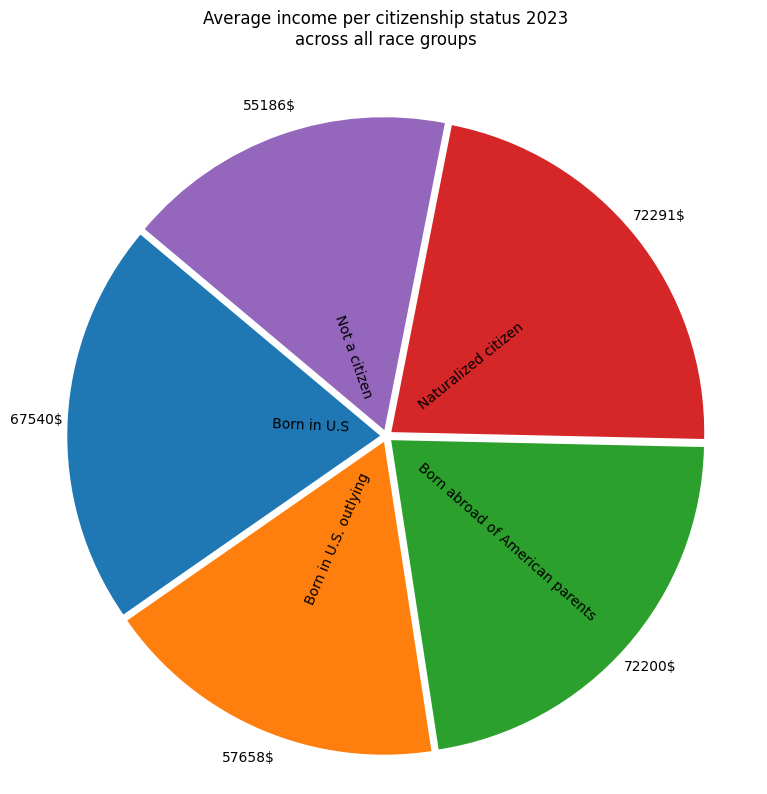

In [39]:
plot_avg_income_citizenship(avg_income_citizen, 2023, 'across all race groups')

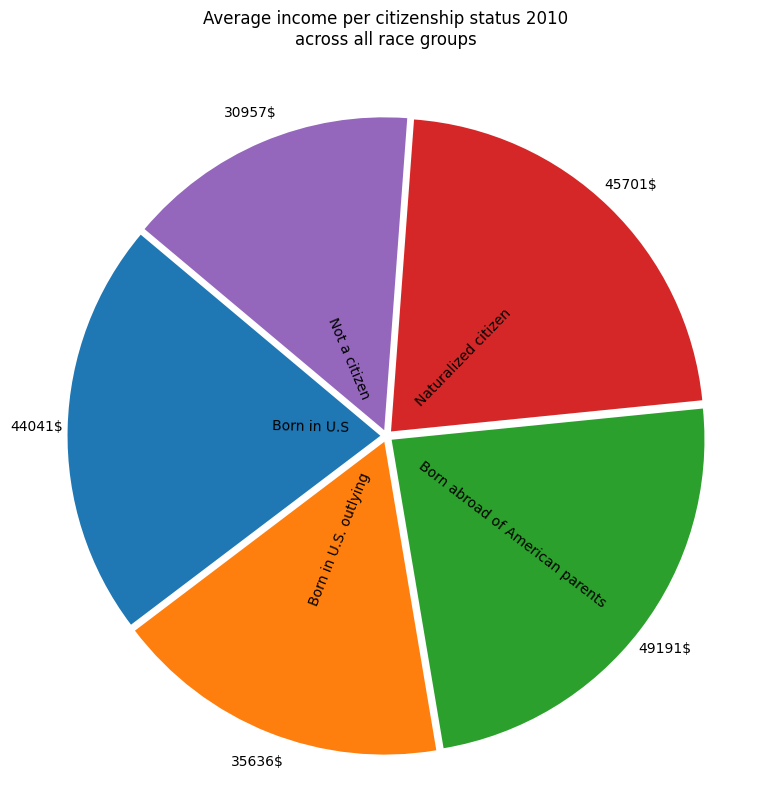

In [40]:
plot_avg_income_citizenship(avg_income_citizen, 2010, 'across all race groups')

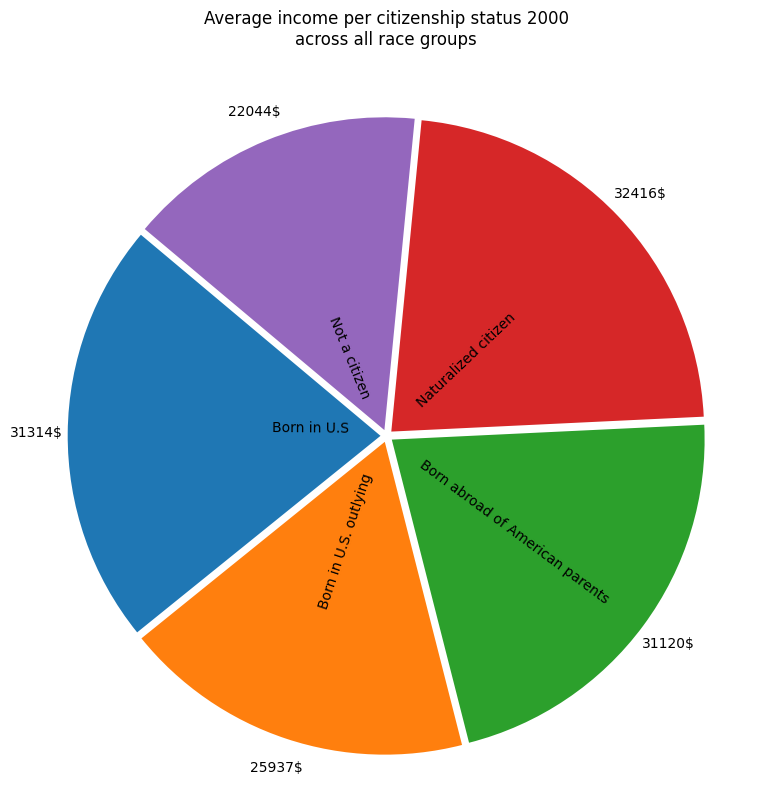

In [41]:
plot_avg_income_citizenship(avg_income_citizen, 2000, 'across all race groups')

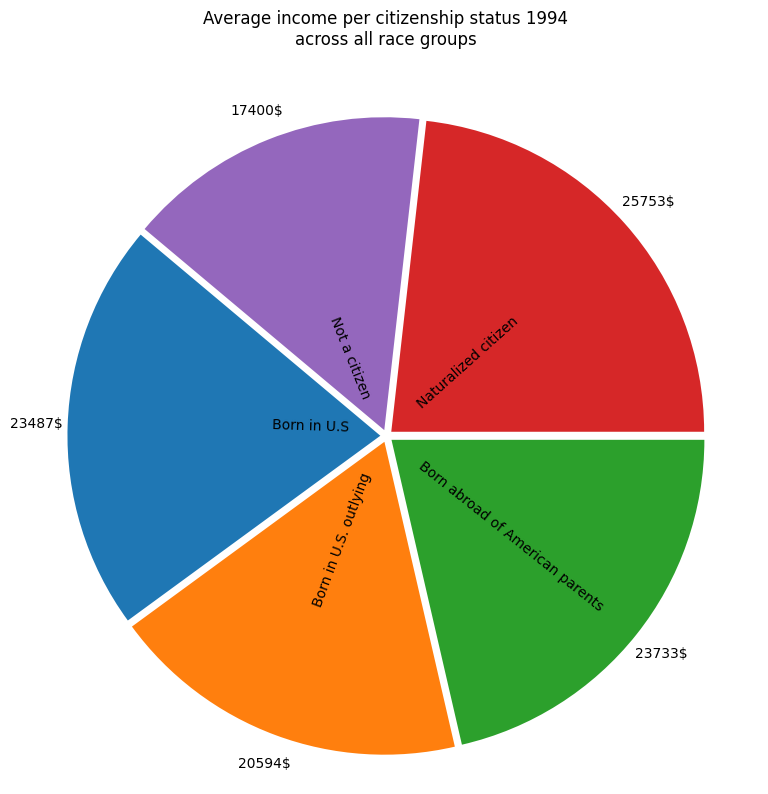

In [42]:
plot_avg_income_citizenship(avg_income_citizen, 1994, 'across all race groups')

How did this evolve over time for all race groups?

In [43]:
def plot_avg_income_citizenship_history(avg_income_citizen: pd.DataFrame, race: str):
    # calculate average income per citizenship and year
    avg_income_per_citizenship = avg_income_citizen.groupby(['CITIZEN', 'YEAR'])['INCWAGE'].mean().reset_index()

    # merge with citizenship titles
    avg_income_per_citizenship = avg_income_per_citizenship.merge(citizenship_codes_df, on='CITIZEN', how='left')

    # plot
    fig, ax = plt.subplots(figsize=(12, 8))

    for status in avg_income_per_citizenship['CITIZEN'].unique():
        current_status = avg_income_per_citizenship[avg_income_per_citizenship['CITIZEN'] == status]
        label = current_status['citizenship_title'].unique().item()
        print(label)
        ax.plot(current_status['YEAR'], current_status['INCWAGE'], label = label)

    fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper left', fontsize = 12, bbox_to_anchor=(0.1, 0.9))

    ax.set_title('Average income per citizenship status over the years', y = 1.05)
    ax.set_xlabel('Year')
    ax.set_ylabel('average income in $')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/citizenship_evolution_{race}.png')
    plt.show()

Born in U.S
Born in U.S. outlying
Born abroad of American parents
Naturalized citizen
Not a citizen


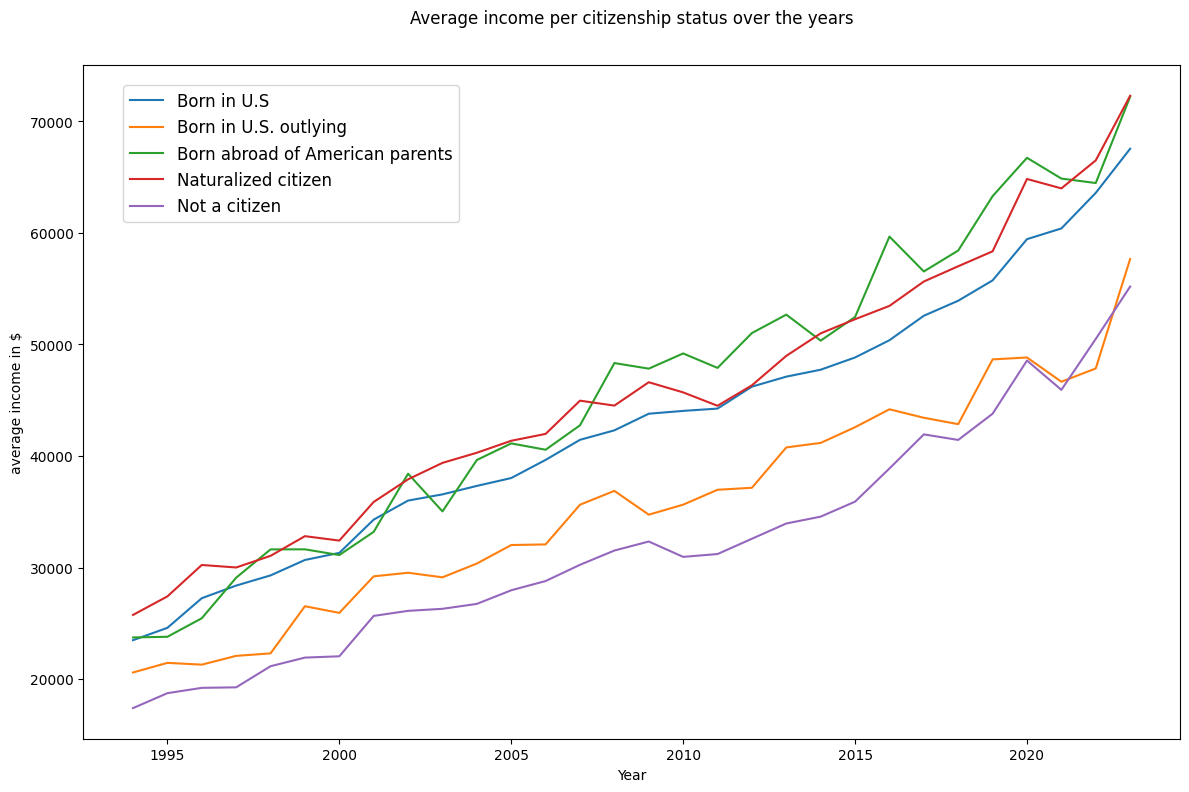

In [44]:
plot_avg_income_citizenship_history(avg_income_citizen, 'across all race groups')

How many people per race belong to a citizenship status?

In [45]:
avg_income_citizen_race = avg_income_citizen[avg_income_citizen['YEAR']==2023].groupby(['RACE', 'CITIZEN'])['ASECWT'].sum().reset_index()

In [46]:
for c in avg_income_citizen_race['CITIZEN'].unique():
    new = avg_income_citizen_race[avg_income_citizen_race['CITIZEN'] == c]#
    display(new.sort_values(by = 'ASECWT', ascending=False))

,RACE,CITIZEN,ASECWT
0,100,1,99821502.72
5,200,1,15959568.42
15,651,1,2903222.87
10,300,1,1280803.67
25,801,1,810018.09
30,802,1,801546.97
35,803,1,592124.01
20,652,1,407811.92
43,805,1,121398.59
39,804,1,104280.32


,RACE,CITIZEN,ASECWT
1,100,2,603403.79
6,200,2,110294.85
21,652,2,66167.67
26,801,2,17876.24
58,810,2,4142.72
31,802,2,3808.25
54,809,2,1672.66
11,300,2,903.91
16,651,2,509.45


,RACE,CITIZEN,ASECWT
2,100,3,928077.05
17,651,3,355349.83
7,200,3,80487.95
36,803,3,52746.80
27,801,3,11748.58
32,802,3,8383.32
46,806,3,8282.55
55,809,3,5161.38
22,652,3,5148.89
59,810,3,3499.95


,RACE,CITIZEN,ASECWT
3,100,4,7059719.11
18,651,4,4482910.05
8,200,4,2118318.02
23,652,4,132944.40
13,300,4,97641.84
28,801,4,69113.24
37,803,4,51268.83
33,802,4,41268.84
60,810,4,25093.96
44,805,4,13945.50


,RACE,CITIZEN,ASECWT
4,100,5,9525939.00
19,651,5,3024597.03
9,200,5,1334867.67
14,300,5,199737.27
29,801,5,109040.37
24,652,5,104090.00
34,802,5,57238.42
38,803,5,33081.69
61,810,5,15049.88
42,804,5,3862.13


### Does the average income per citizenship status differs between races?

100


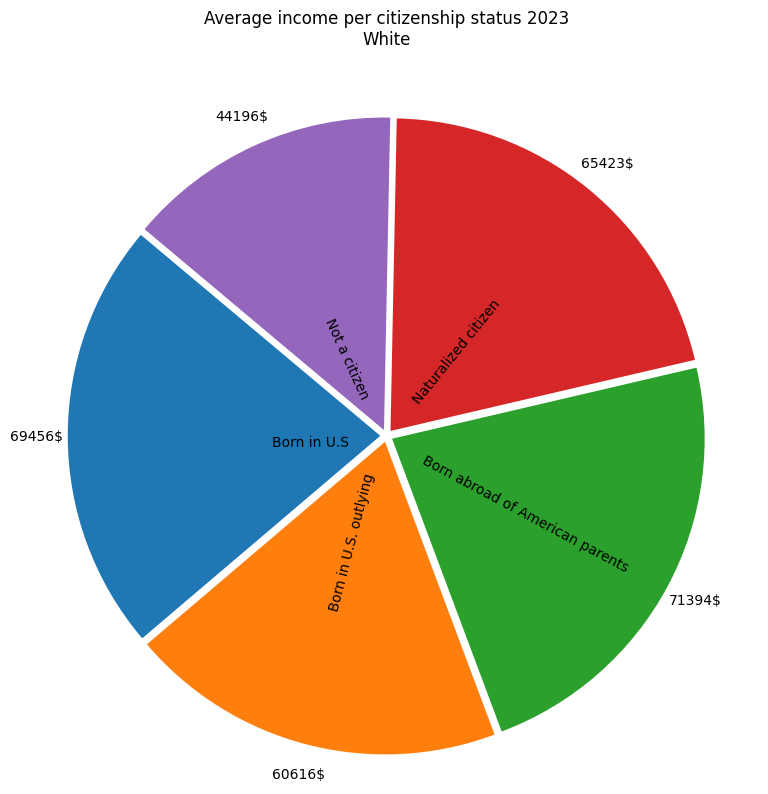

200


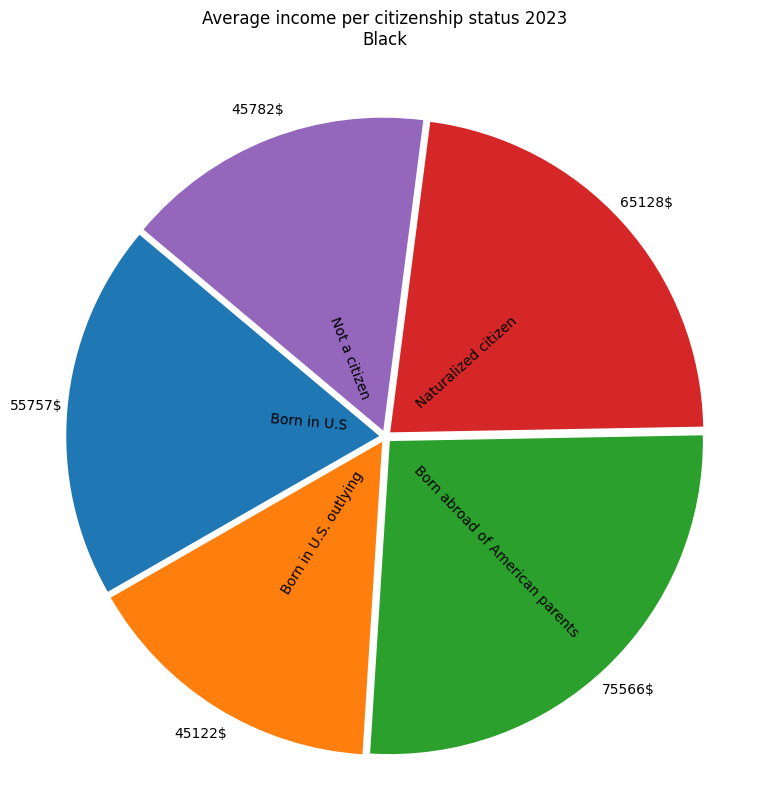

651


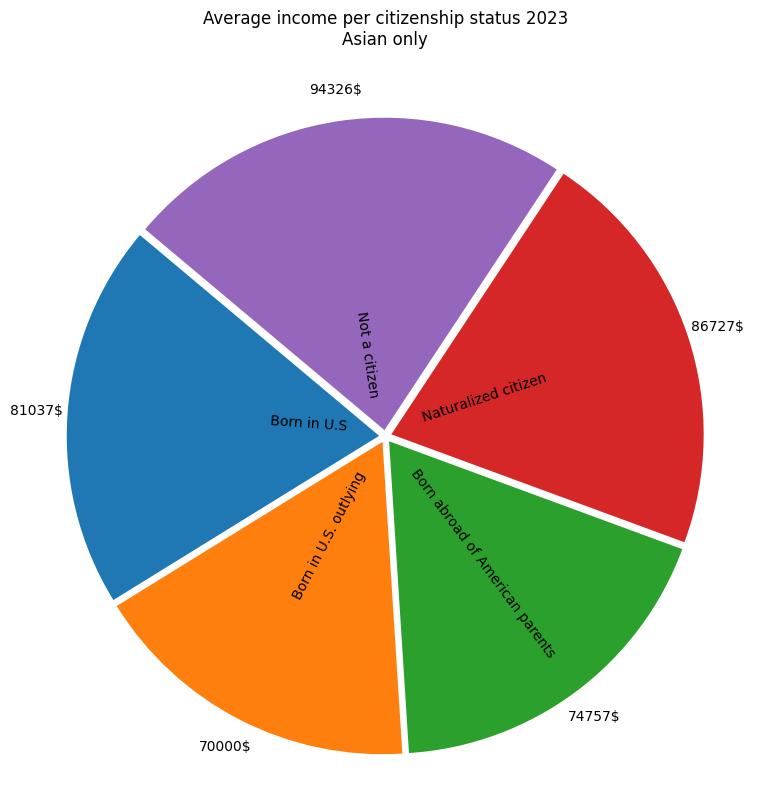

300


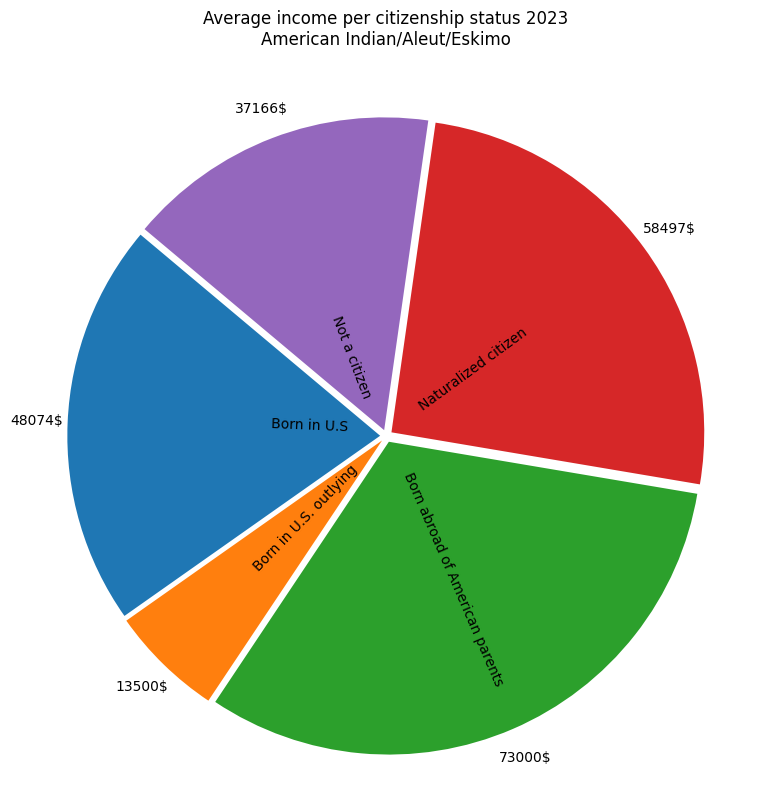

801


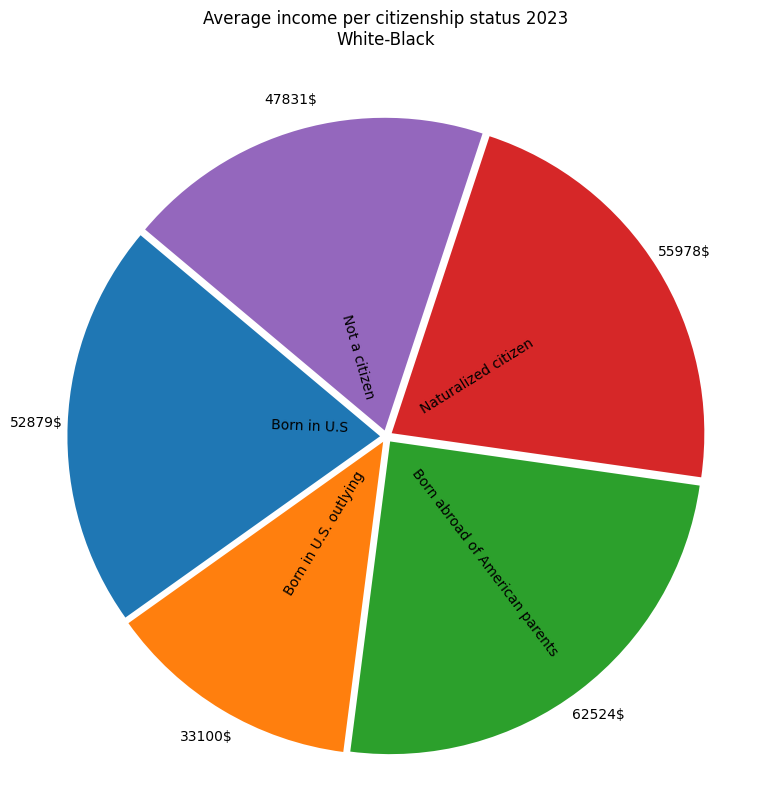

In [49]:
for r in top_5_races:
    print(r)
    # select only entries from race r
    avg_income_citizen_race = avg_income_citizen[avg_income_citizen['RACE'] == r]

    # plot average income per citizenship for race r
    r_title = race_codes_df[race_codes_df['RACE'] == r]['race_title'].item()
    plot_avg_income_citizenship(avg_income_citizen_race, 2023, r_title, r)

----
## Does the average income per occupation differ from race to race?

In [83]:
data_df

,YEAR,SERIAL,CPSID,ASECFLAG,PERNUM,ASECWT,AGE,SEX,RACE,ASIAN,...,OCCLY,OCC10LY,INCWAGE,MIGSTA1,WHYMOVE,MIGRATE1,Category,occ_title,race_comp_all,race_comp_2003
0,1968,1,NaN,NaN,1,1163.22,28,1,100,NaN,...,161.0,2910.0,0,NaN,NaN,1.0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","Managers, nec (including Postmasters)",100,100
1,1968,35,NaN,NaN,1,1268.58,60,1,100,NaN,...,290.0,430.0,10000,NaN,NaN,1.0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","Managers, nec (including Postmasters)",100,100
2,1968,44,NaN,NaN,1,1230.62,25,1,100,NaN,...,290.0,430.0,7100,NaN,NaN,1.0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","Managers, nec (including Postmasters)",100,100
3,1968,61,NaN,NaN,1,1343.78,62,1,100,NaN,...,290.0,430.0,30000,NaN,NaN,1.0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","Managers, nec (including Postmasters)",100,100
4,1968,62,NaN,NaN,1,1346.78,34,1,100,NaN,...,290.0,430.0,12000,NaN,NaN,1.0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","Managers, nec (including Postmasters)",100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052243,2023,81348,0.000000e+00,1.0,2,3443.92,37,1,100,99.0,...,7855.0,7855.0,71104,99.0,0.0,1.0,PRODUCTION,"Food Processing, nec",100,100
4052244,2023,85581,2.023020e+13,1.0,1,1698.29,56,2,100,99.0,...,7855.0,7855.0,47000,99.0,0.0,1.0,PRODUCTION,"Food Processing, nec",100,100
4052245,2023,86621,2.022010e+13,1.0,1,213.63,50,1,100,99.0,...,7855.0,7855.0,53000,99.0,0.0,1.0,PRODUCTION,"Food Processing, nec",100,100
4052246,2023,86664,0.000000e+00,1.0,3,428.77,55,2,651,30.0,...,7855.0,7855.0,45000,99.0,0.0,1.0,PRODUCTION,"Food Processing, nec",700,651


In [84]:
avg_income_occ = data_df[['OCC2010', 'RACE', 'INCWAGE', 'YEAR', 'occ_title']]

In [85]:
data_df[data_df['INCWAGE']==0.]['OCC2010']

0           430.0
7           430.0
13          430.0
16          430.0
17          430.0
            ...  
4051858    7855.0
4052024    7855.0
4052105    7855.0
4052182    7855.0
4052202    7855.0
Name: OCC2010, Length: 291875, dtype: float64

In [86]:
df_802 = avg_income_occ[avg_income_occ['RACE'] == 802]
df_802[df_802['OCC2010'] == 205]

,OCC2010,RACE,INCWAGE,YEAR,occ_title
1044245,205.0,802,0,2003,"Farmers, Ranchers, and Other Agricultural Mana..."
1044401,205.0,802,0,2003,"Farmers, Ranchers, and Other Agricultural Mana..."
1044462,205.0,802,35000,2003,"Farmers, Ranchers, and Other Agricultural Mana..."
1044671,205.0,802,10000,2003,"Farmers, Ranchers, and Other Agricultural Mana..."
1044701,205.0,802,750,2003,"Farmers, Ranchers, and Other Agricultural Mana..."
...,...,...,...,...,...
1057252,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana..."
1057274,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana..."
1057283,205.0,802,0,2022,"Farmers, Ranchers, and Other Agricultural Mana..."
1057474,205.0,802,0,2023,"Farmers, Ranchers, and Other Agricultural Mana..."


In [87]:
avg_income_occ_2023 = avg_income_occ[avg_income_occ['YEAR'] == 2023]

In [88]:
occ2010_df

,Code,occ_title
0,10,Chief executives and legislators/public admini...
1,20,General and Operations Managers
2,30,"Managers in Marketing, Advertising, and Public..."
3,100,Administrative Services Managers
4,110,Computer and Information Systems Managers
...,...,...
453,9800,Military Officer Special and Tactical Operatio...
454,9810,First-Line Enlisted Military Supervisors
455,9820,Military Enlisted Tactical Operations and Air/...
456,9830,"Military, Rank Not Specified"


In [89]:
avg_income_occ_2023 = avg_income_occ_2023.groupby(['OCC2010','RACE'])['INCWAGE'].mean().reset_index()
avg_income_occ_2023 = avg_income_occ_2023.merge(occ2010_df, left_on='OCC2010', right_on='Code', how='left')
avg_income_occ_2023.drop('Code', axis=1, inplace=True)

In [90]:
avg_income_occ_2023[avg_income_occ_2023['INCWAGE'] == 0.]

,OCC2010,RACE,INCWAGE,occ_title
79,205.0,802,0.0,"Farmers, Ranchers, and Other Agricultural Mana..."
228,710.0,810,0.0,Management Analysts
544,2100.0,803,0.0,"Lawyers, and judges, magistrates, and other ju..."
545,2100.0,805,0.0,"Lawyers, and judges, magistrates, and other ju..."
569,2200.0,811,0.0,Postsecondary Teachers
574,2300.0,652,0.0,Preschool and Kindergarten Teachers
652,2600.0,300,0.0,Artists and Related Workers
678,2750.0,300,0.0,"Musicians, Singers, and Related Workers"
680,2750.0,802,0.0,"Musicians, Singers, and Related Workers"
681,2750.0,803,0.0,"Musicians, Singers, and Related Workers"


In [91]:
data_df[(data_df['YEAR'] == 2023) & (data_df['RACE'] == 100) & (data_df['occ_title'] == 'Furniture Finishers')]

,YEAR,SERIAL,CPSID,ASECFLAG,PERNUM,ASECWT,AGE,SEX,RACE,ASIAN,...,OCCLY,OCC10LY,INCWAGE,MIGSTA1,WHYMOVE,MIGRATE1,Category,occ_title,race_comp_all,race_comp_2003
3538377,2023,2004,2.023030e+13,1.0,1,396.30,59,1,100,99.0,...,8510.0,8510.0,0,99.0,0.0,1.0,PRODUCTION,Furniture Finishers,100,100
3538378,2023,2367,2.023030e+13,1.0,1,430.68,62,1,100,99.0,...,8510.0,8510.0,0,99.0,0.0,1.0,PRODUCTION,Furniture Finishers,100,100
3538380,2023,40175,0.000000e+00,1.0,1,1444.69,35,2,100,99.0,...,8510.0,8510.0,0,99.0,0.0,1.0,PRODUCTION,Furniture Finishers,100,100


In [92]:
race_codes_df

,RACE,race_title,start,end
0,100,White,1967,2023
1,200,Black,1967,2023
2,300,American Indian/Aleut/Eskimo,1988,2023
3,650,Asian or Pacific Islander,1988,2003
4,651,Asian only,2003,2023
5,652,Hawaiian/Pacific Islander only,2003,2023
6,700,"Other (single) race, n.e.c.",1967,1998
7,800,Two or more races,2003,2023
8,801,White-Black,2003,2023
9,802,White-American Indian,2003,2023


In [93]:
def plot_avg_income_occupation(avg_income_occ: pd.DataFrame, year: int, race: str):

    # select year
    avg_income_occ = avg_income_occ[avg_income_occ['YEAR'] == year]

    # calculate average income per occupation
    avg_income_occ = avg_income_occ.groupby('OCC2010')['INCWAGE'].mean().reset_index()

    # merge with occupation titles
    avg_income_occ = avg_income_occ.merge(occ2010_df, left_on='OCC2010', right_on='Code', how='left')
    avg_income_occ.drop('Code', axis=1, inplace=True)


    sorted = avg_income_occ.sort_values('INCWAGE', ascending=False)
    top_income = sorted.head(4)
    low_income = sorted.tail(4)
    income = pd.concat([top_income, low_income], ignore_index=True)

    # plot as bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_container = ax.bar(income['occ_title'], income['INCWAGE'], color=plt.cm.tab20c.colors
                )

    race_title = race_codes_df[race_codes_df['RACE'] == race]['race_title'].item()
    ax.set_title(f'Top/Lowest average incomes per occupation {year}\n{race_title}', y = 1)
    ax.set(ylabel='Average income $')
    ax.bar_label(bar_container, fmt='{:.0f}$')
    ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')

    plt.tight_layout()
    plt.savefig(f'../../plots/income/top_lowest_{year}_{race}.png')
    plt.show()

100


C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


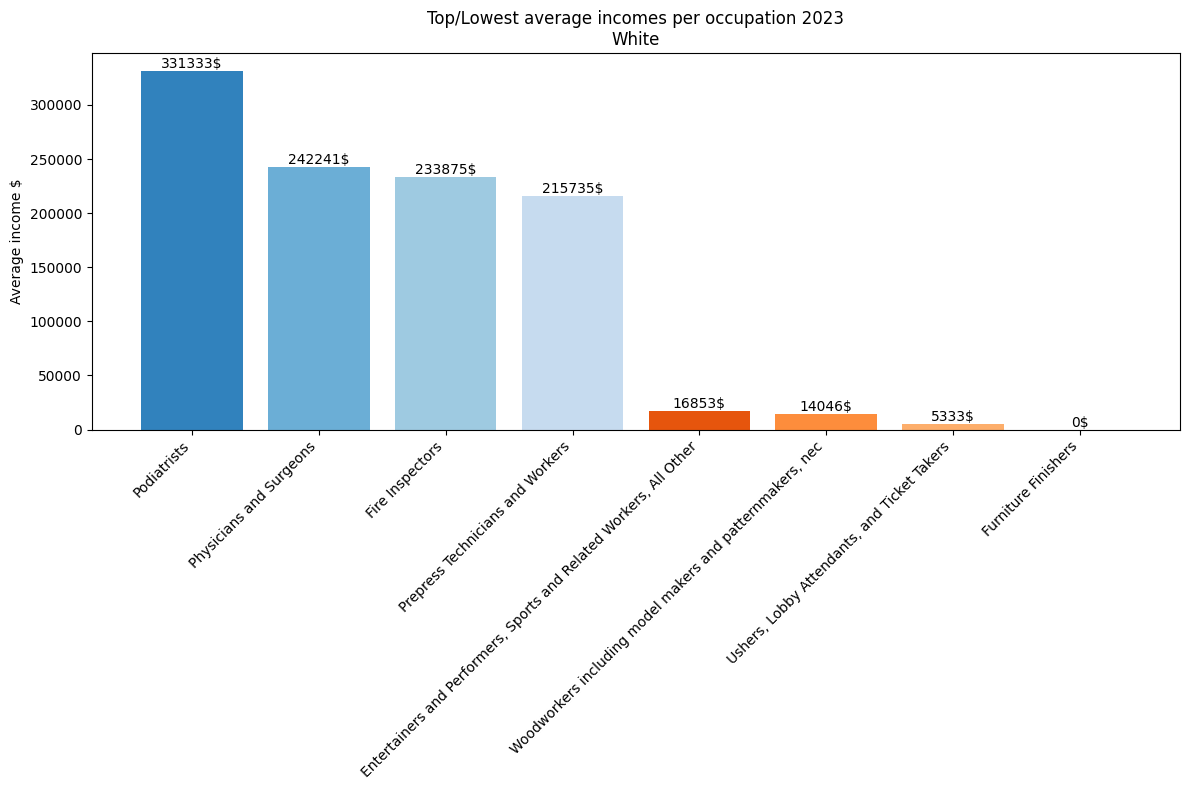

200


C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


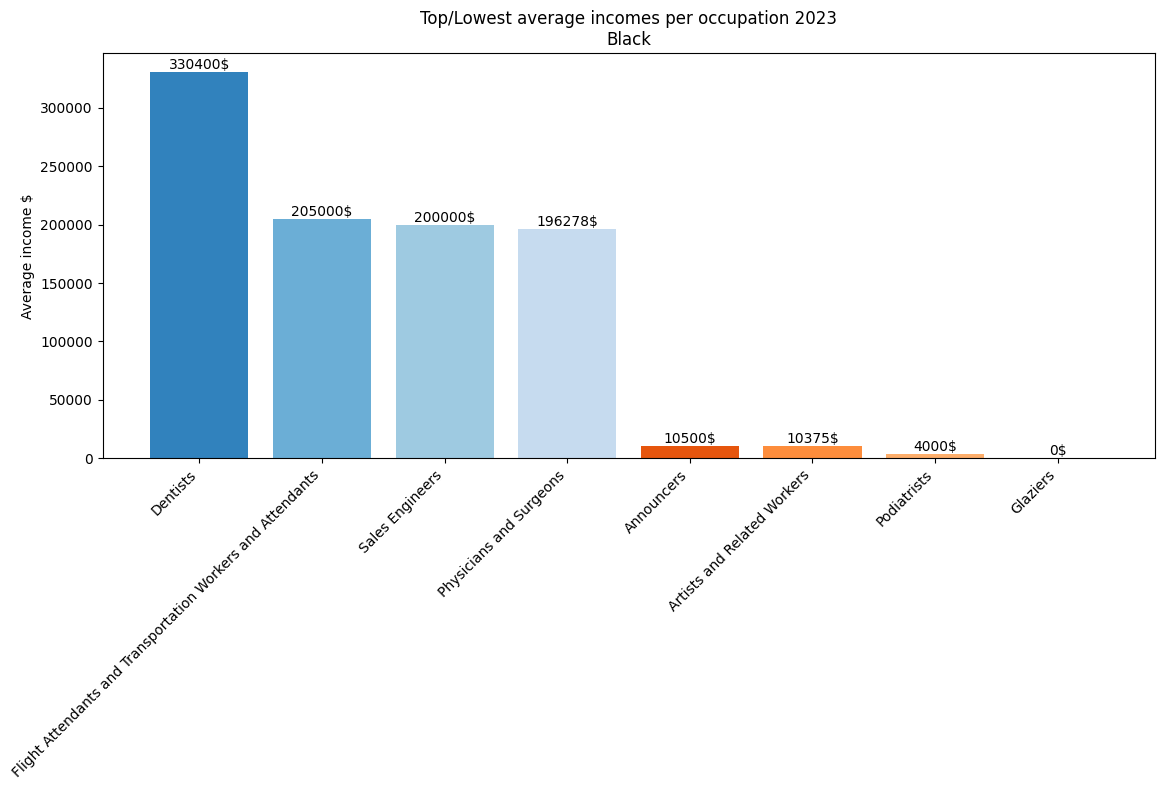

651


C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


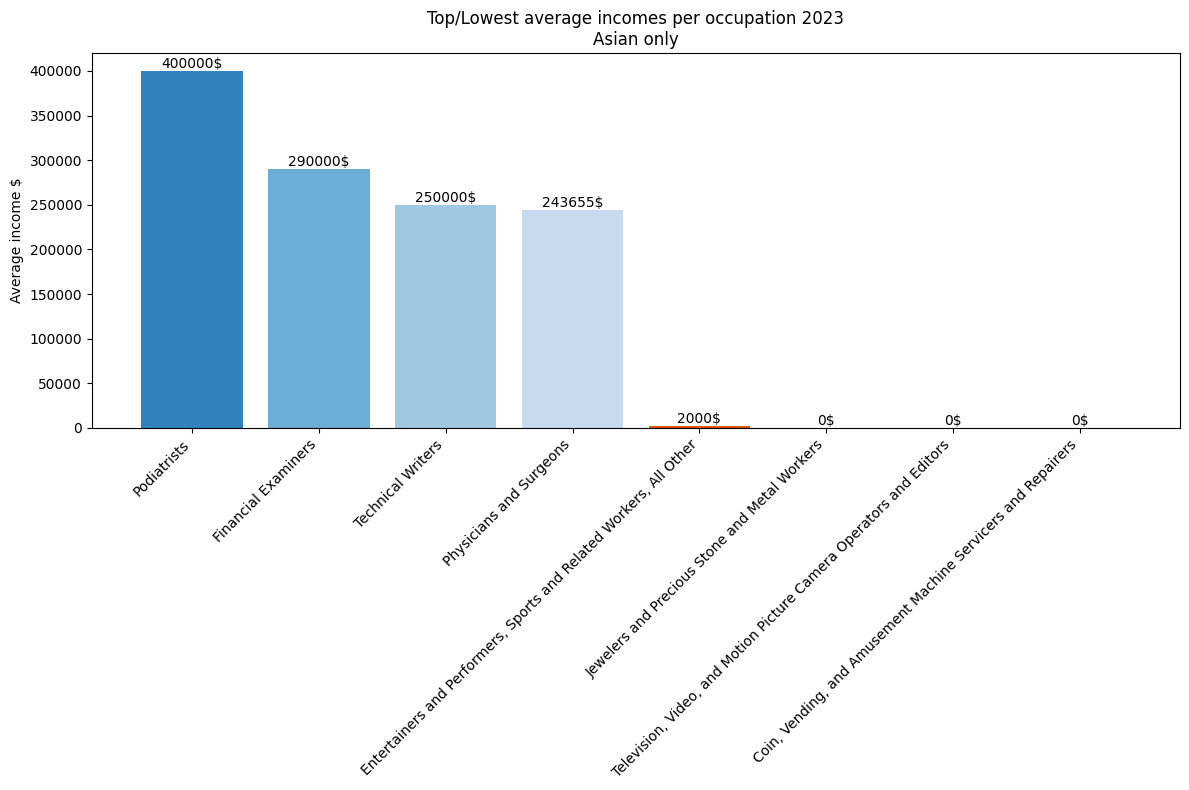

300


C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')


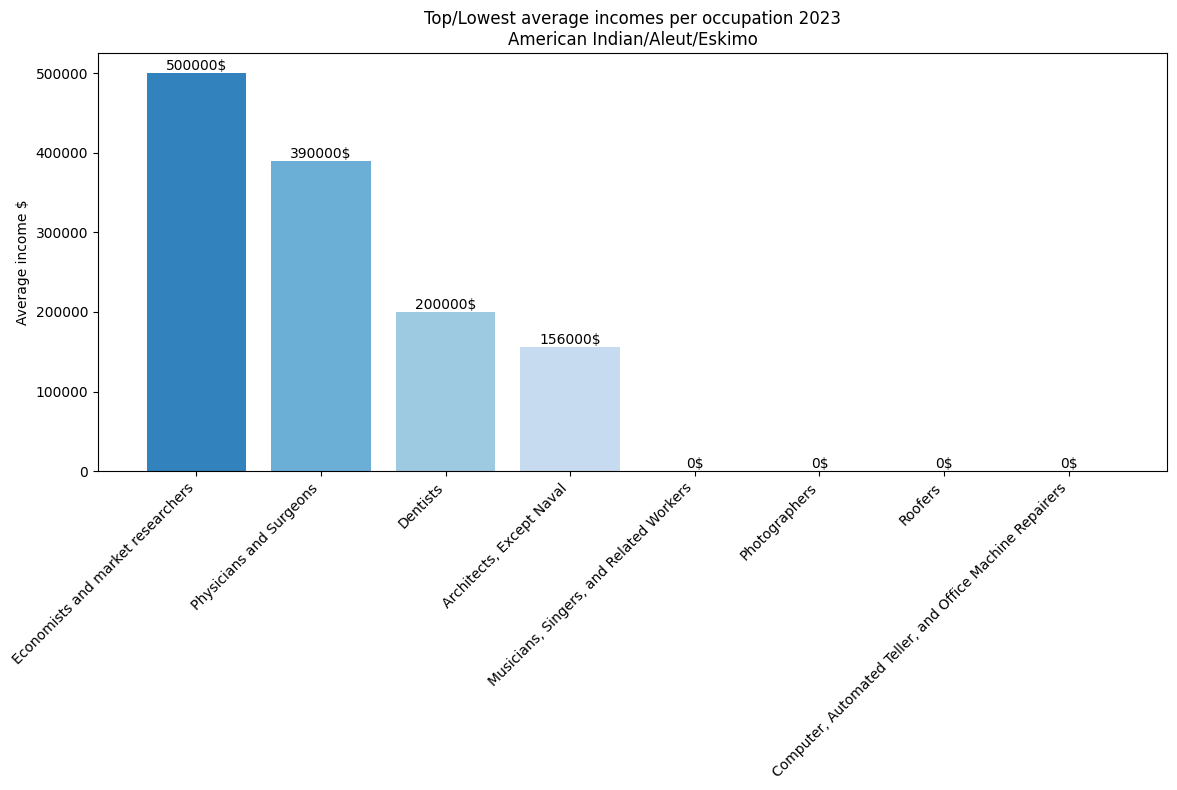

801


C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(income['occ_title'], rotation = 45, ha='right')
C:\Users\jputz\AppData\Local\Temp\ipykernel_31536\2665068503.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


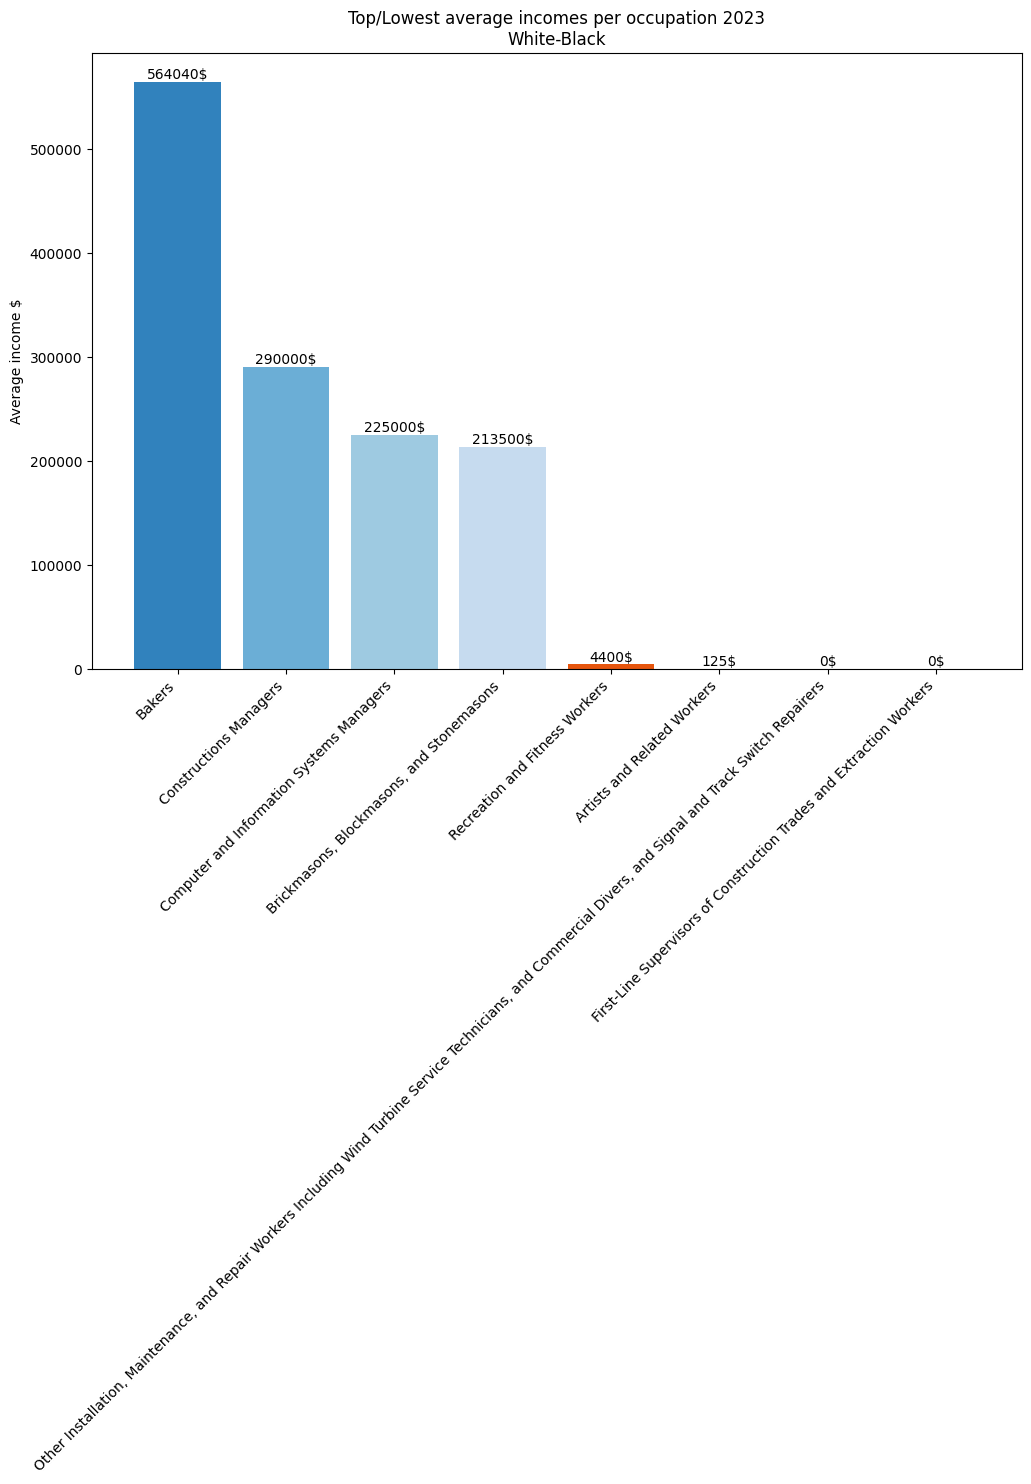

In [94]:
for r in top_5_races:
    print(r)
    # select only entries from race r
    avg_income_occ_r = avg_income_occ[avg_income_occ['RACE'] == r]

    # plot average income per citizenship for race r
    plot_avg_income_occupation(avg_income_occ_r, 2023, r)

----
## Income per occupation category/occupation

In [39]:
income_occ_cat = data_df[['YEAR', 'RACE', 'Category', 'INCWAGE']]
income_occ_cat_23 = income_occ_cat[income_occ_cat['YEAR'] == 2023]

In [44]:
income_occ_cat_23.groupby('Category')['INCWAGE'].mean().reset_index().sort_values(by = 'INCWAGE')

,Category,INCWAGE
20,PERSONAL CARE AND SERVICE,27911.811759
11,FOOD PREPARATION AND SERVING,29974.291339
2,BUILDING AND GROUNDS CLEANING AND MAINTENANCE,31604.594464
13,HEALTHCARE SUPPORT,37202.403075
9,"FARMING, FISHING, AND FORESTRY",37497.667453
19,OFFICE AND ADMINISTRATIVE SUPPORT,47067.510060
25,TRANSPORTATION AND MATERIAL MOVING,48272.601614
6,CONSTRUCTION,49585.326249
21,PRODUCTION,50057.777998
4,COMMUNITY AND SOCIAL SERVICES,52562.094926
